In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels

### 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
df_Sparkling = pd.read_csv('Sparkling.csv')
df_Sparkling.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [3]:
df_Sparkling.shape

(187, 2)

In [4]:
df_Sparkling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
YearMonth    187 non-null object
Sparkling    187 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [5]:
df_Sparkling.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [6]:
df_Sparkling.drop(['YearMonth'],axis=1,inplace=True)

In [7]:
df_Sparkling['YearMonth']=pd.date_range(start='1980-01',end='1995-08',freq='M')

In [8]:
df_Sparkling.set_index('YearMonth',inplace=True)

In [9]:
df_Sparkling.head()

,Sparkling
YearMonth,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [10]:
df_Sparkling.dtypes

Sparkling    int64
dtype: object

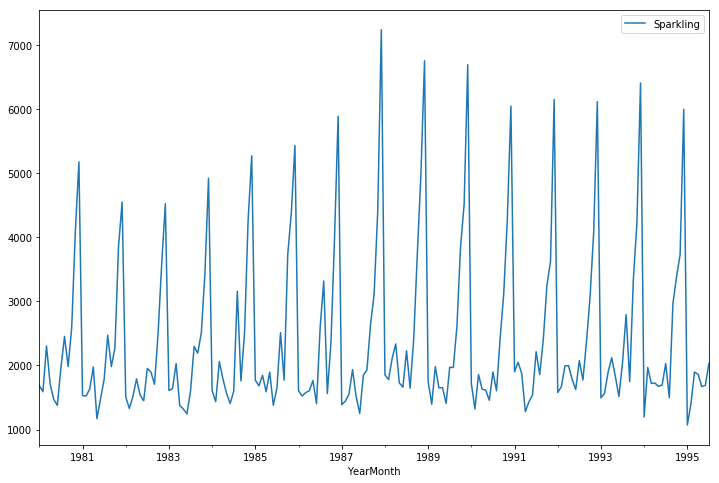

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df_Sparkling.plot()
plt.show()

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [12]:
df_Sparkling.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


Text(0.5, 0, 'Year')

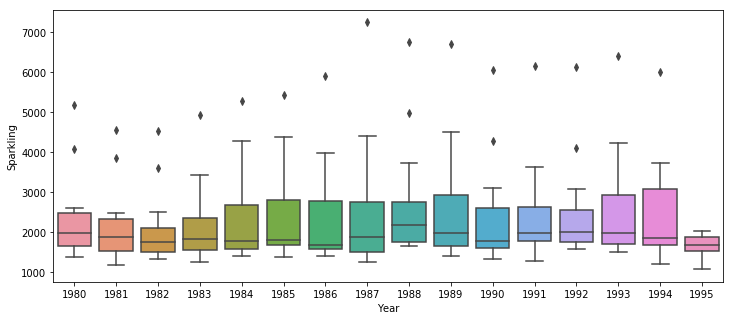

In [13]:
plt.figure(figsize=(12,5))
sns.boxplot(df_Sparkling.index.year,df_Sparkling['Sparkling'])
plt.xlabel('Year')

Text(0.5, 0, 'Months')

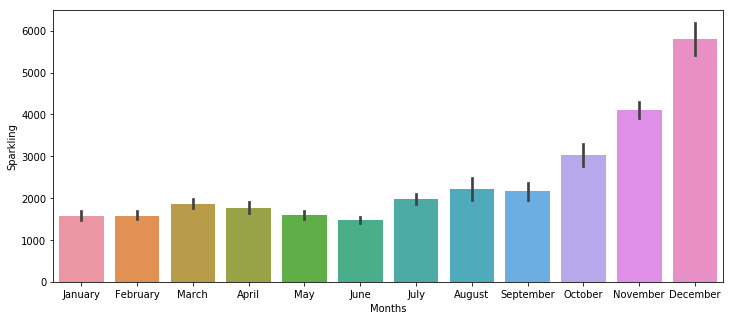

In [14]:
plt.figure(figsize=(12,5))
sns.barplot(df_Sparkling.index.month_name(),df_Sparkling['Sparkling'])
plt.xlabel('Months')

In [15]:
#Creating PIVOT table.
monthly_sales_across_years_Sparkling = pd.pivot_table(df_Sparkling, values = 'Sparkling', columns = df_Sparkling.index.month_name(), index = df_Sparkling.index.year)
monthly_sales_across_years_Sparkling

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


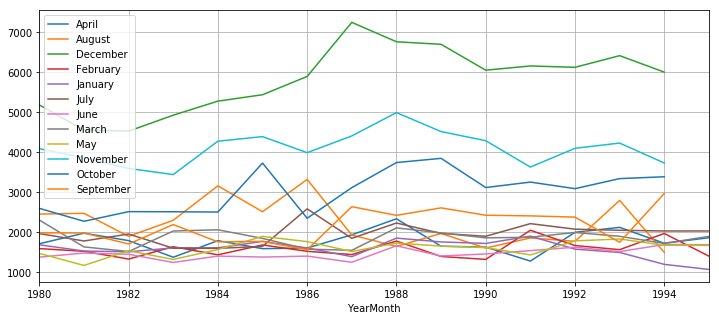

In [16]:
monthly_sales_across_years_Sparkling.plot(figsize=(12,5))
plt.grid()
plt.legend(loc='best');

###### Decomposition

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
decompose_addition_sparkling=seasonal_decompose(df_Sparkling,model='additive',extrapolate_trend='freq')

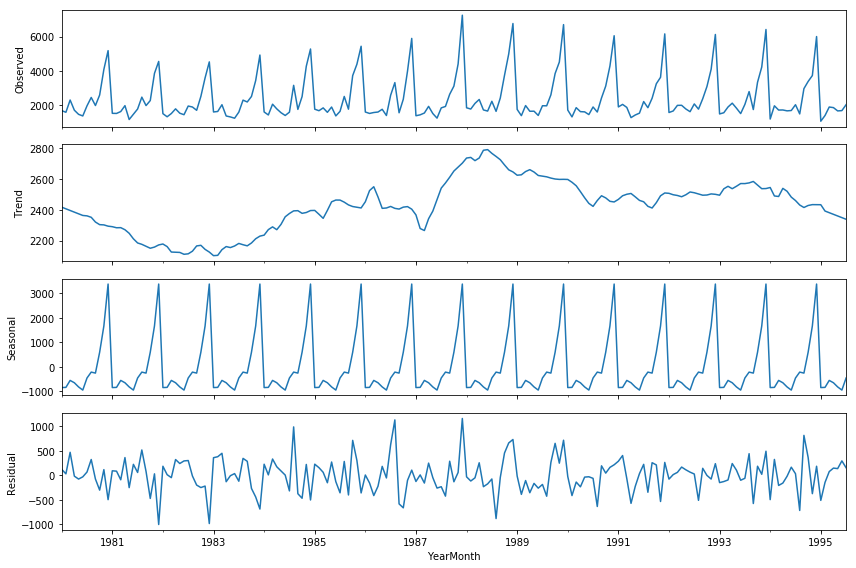

<Figure size 1008x720 with 0 Axes>

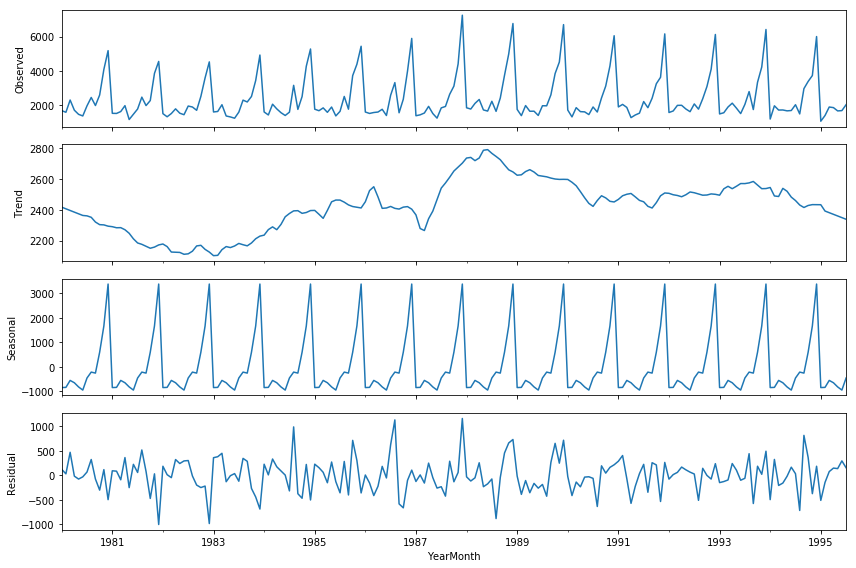

In [19]:
plt.figure(figsize=(14,10))
decompose_addition_sparkling.plot()

In [20]:
trend_add_sparkling = decompose_addition_sparkling.trend
seasonality_add_sparkling = decompose_addition_sparkling.seasonal
residual_add_sparkling = decompose_addition_sparkling.resid

print('Trend','\n',trend_add_sparkling.head(5),'\n')
print('Seasonality','\n',seasonality_add_sparkling.head(5),'\n')
print('Residual','\n',residual_add_sparkling.head(5),'\n')

Trend 
               Sparkling
YearMonth              
1980-01-31  2417.116647
1980-02-29  2406.350767
1980-03-31  2395.584887
1980-04-30  2384.819007
1980-05-31  2374.053127 

Seasonality 
              Sparkling
YearMonth             
1980-01-31 -852.939513
1980-02-29 -845.687698
1980-03-31 -560.602944
1980-04-30 -656.317669
1980-05-31 -827.225103 

Residual 
              Sparkling
YearMonth             
1980-01-31  121.822865
1980-02-29   30.336930
1980-03-31  469.018056
1980-04-30  -16.501338
1980-05-31  -75.828025 



In [21]:
decompose_multi_Sparkling=seasonal_decompose(df_Sparkling,model='multiplicative',extrapolate_trend='freq')

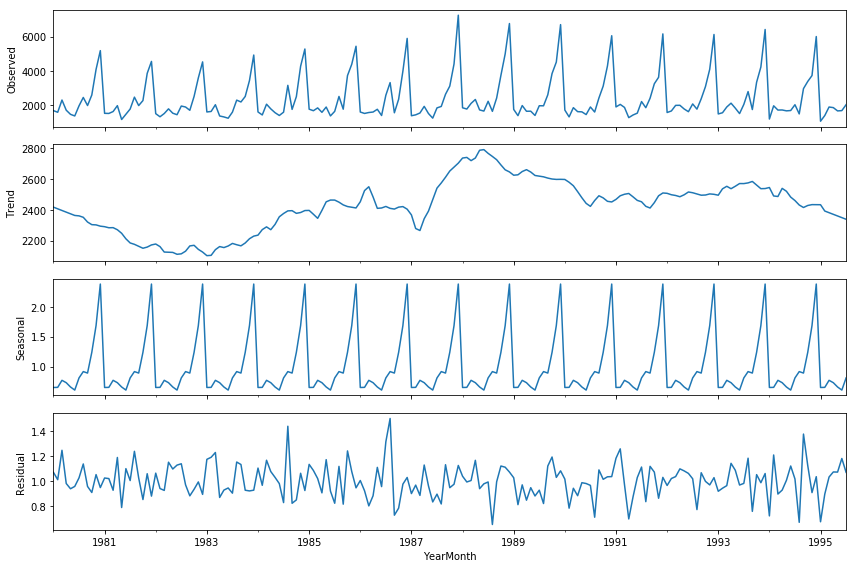

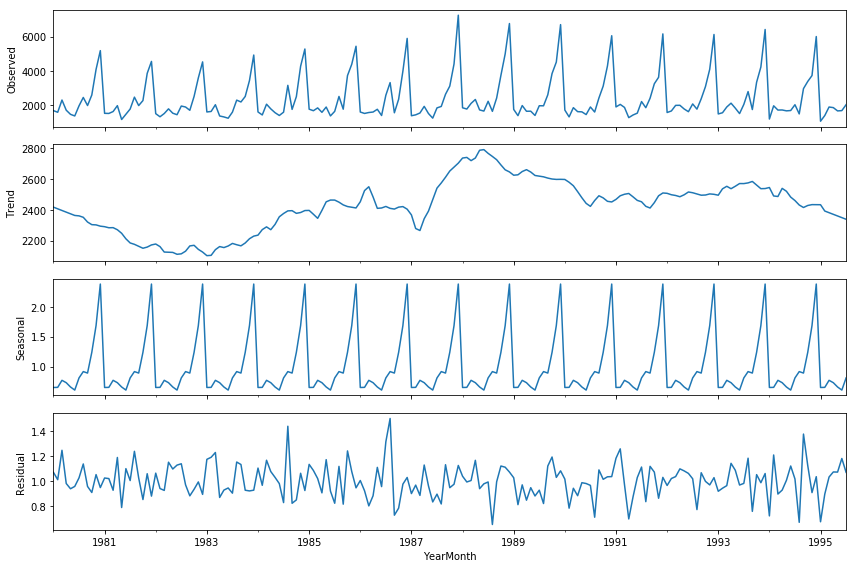

In [22]:
decompose_multi_Sparkling.plot()

In [23]:
trend_mul_Sparkling = decompose_multi_Sparkling.trend
seasonality_mul_Sparkling = decompose_multi_Sparkling.seasonal
residual_mul_Sparkling = decompose_multi_Sparkling.resid

print('Trend','\n',trend_mul_Sparkling.head(5),'\n')
print('Seasonality','\n',seasonality_mul_Sparkling.head(5),'\n')
print('Residual','\n',residual_mul_Sparkling.head(5),'\n')

Trend 
               Sparkling
YearMonth              
1980-01-31  2417.116647
1980-02-29  2406.350767
1980-03-31  2395.584887
1980-04-30  2384.819007
1980-05-31  2374.053127 

Seasonality 
             Sparkling
YearMonth            
1980-01-31   0.651394
1980-02-29   0.653344
1980-03-31   0.770983
1980-04-30   0.731422
1980-05-31   0.659550 

Residual 
             Sparkling
YearMonth            
1980-01-31   1.070819
1980-02-29   1.011975
1980-03-31   1.247458
1980-04-30   0.981478
1980-05-31   0.939452 



### 3. Split the data into training and test. The test data should start in 1991.

In [24]:
train_Sparkling= df_Sparkling[df_Sparkling.index<'1991'] 
test_Sparkling= df_Sparkling[df_Sparkling.index>='1991']

In [25]:
train_Sparkling.tail()

,Sparkling
YearMonth,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


In [26]:
test_Sparkling.head()

,Sparkling
YearMonth,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


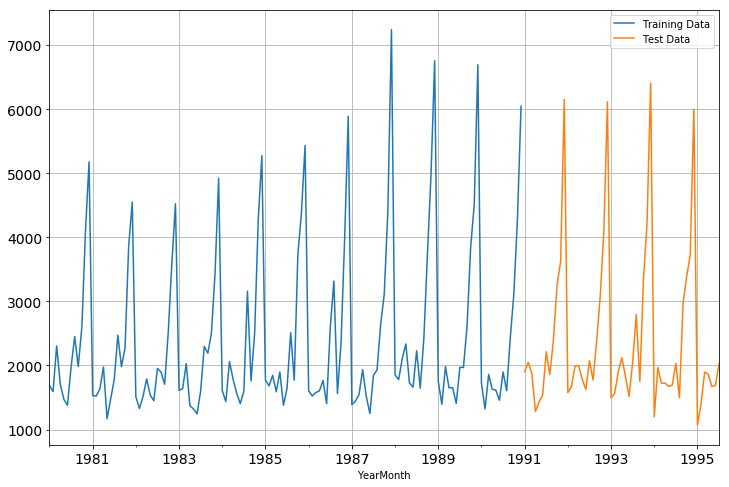

In [27]:
train_Sparkling['Sparkling'].plot(fontsize=14)
test_Sparkling['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4.  Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [28]:
train_time_Sparkling = [i+1 for i in range(len(train_Sparkling))]
test_time_Sparkling = [i+133 for i in range(len(test_Sparkling))]
print('Training Time instance for Sparkling dataset','\n','\n',train_time_Sparkling,'\n')
print('\n','Test Time instance for Sparkling dataset','\n','\n',test_time_Sparkling)

Training Time instance for Sparkling dataset 
 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 


 Test Time instance for Sparkling dataset 
 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [29]:
LinearRegression_train_Sparkling = train_Sparkling.copy()
LinearRegression_test_Sparkling = test_Sparkling.copy()

In [30]:
LinearRegression_train_Sparkling['time'] = train_time_Sparkling
LinearRegression_test_Sparkling['time'] = test_time_Sparkling

print('First few rows of Training Data')
display(LinearRegression_train_Sparkling.head())
print('Last few rows of Training Data')
display(LinearRegression_train_Sparkling.tail())
print('First few rows of Test Data')
display(LinearRegression_test_Sparkling.head())
print('Last few rows of Test Data')
display(LinearRegression_test_Sparkling.tail())

First few rows of Training Data


,Sparkling,time
YearMonth,,
1980-01-31,1686,1
1980-02-29,1591,2
1980-03-31,2304,3
1980-04-30,1712,4
1980-05-31,1471,5


Last few rows of Training Data


,Sparkling,time
YearMonth,,
1990-08-31,1605,128
1990-09-30,2424,129
1990-10-31,3116,130
1990-11-30,4286,131
1990-12-31,6047,132


First few rows of Test Data


,Sparkling,time
YearMonth,,
1991-01-31,1902,133
1991-02-28,2049,134
1991-03-31,1874,135
1991-04-30,1279,136
1991-05-31,1432,137


Last few rows of Test Data


,Sparkling,time
YearMonth,,
1995-03-31,1897,183
1995-04-30,1862,184
1995-05-31,1670,185
1995-06-30,1688,186
1995-07-31,2031,187


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr_Sparkling = LinearRegression()

In [33]:
lr_Sparkling.fit(LinearRegression_train_Sparkling[['time']],LinearRegression_train_Sparkling['Sparkling'])

LinearRegression()

In [34]:
train_predictions_model1_Sparkling         = lr_Sparkling.predict(LinearRegression_train_Sparkling[['time']])
LinearRegression_train_Sparkling['RegOnTime'] = train_predictions_model1_Sparkling

test_predictions_model1_Sparkling         = lr_Sparkling.predict(LinearRegression_test_Sparkling[['time']])
LinearRegression_test_Sparkling['RegOnTime'] = test_predictions_model1_Sparkling

In [35]:
LinearRegression_train_Sparkling.head()

,Sparkling,time,RegOnTime
YearMonth,,,
1980-01-31,1686,1,2021.741171
1980-02-29,1591,2,2027.573830
1980-03-31,2304,3,2033.406488
1980-04-30,1712,4,2039.239147
1980-05-31,1471,5,2045.071805


In [36]:
LinearRegression_test_Sparkling.head()

,Sparkling,time,RegOnTime
YearMonth,,,
1991-01-31,1902,133,2791.652093
1991-02-28,2049,134,2797.484752
1991-03-31,1874,135,2803.317410
1991-04-30,1279,136,2809.150069
1991-05-31,1432,137,2814.982727


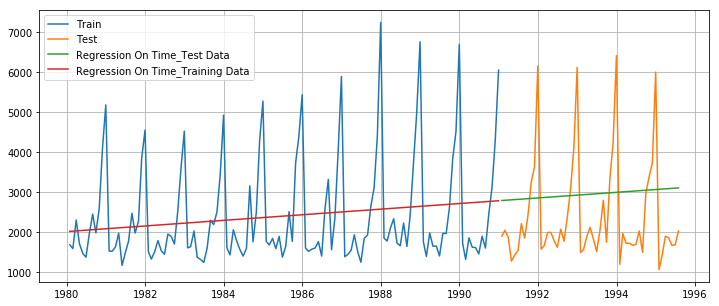

In [37]:
plt.figure(figsize=(12,5))
plt.plot(train_Sparkling['Sparkling'], label='Train')
plt.plot(test_Sparkling['Sparkling'], label='Test')
plt.plot(LinearRegression_test_Sparkling['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train_Sparkling['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [38]:
from sklearn import metrics

In [39]:
def MAPE(y, y_hat): 
    y, y_hat = np.array(y), np.array(y_hat)
    try:
        mape =  round(np.sum(np.abs(y_hat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [40]:
## Training Data - RMSE and MAPE

rmse_model1_train_Sparkling = metrics.mean_squared_error(train_Sparkling['Sparkling'],train_predictions_model1_Sparkling,squared=False)
mape_model1_train_Sparkling = MAPE(train_Sparkling['Sparkling'],train_predictions_model1_Sparkling)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_train_Sparkling, mape_model1_train_Sparkling))

For RegressionOnTime forecast on the Training Data,  RMSE is 1279.322 and MAPE is 40.05


In [41]:
## Test Data - RMSE and MAPE

rmse_model1_test_Sparkling = metrics.mean_squared_error(test_Sparkling['Sparkling'],test_predictions_model1_Sparkling,squared=False)
mape_model1_test_Sparkling = MAPE(test_Sparkling['Sparkling'],test_predictions_model1_Sparkling)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_test_Sparkling, mape_model1_test_Sparkling))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 and MAPE is 50.15


In [42]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test_Sparkling],'Test MAPE': [mape_model1_test_Sparkling]},index=['Regression On Time'])
resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15


### Model - 2: Naive Approach: ($\hat{y}_{t+1} = y_t$)

###### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [43]:
#In this model the last value of the training dataset is taken as the predicted values
NaiveModel_train_Sparkling = train_Sparkling.copy()
NaiveModel_test_Sparkling = test_Sparkling.copy()

In [44]:
## Let us get the last value (or the most recent value) of the training set.
NaiveModel_train_Sparkling['naive'] = np.asarray(train_Sparkling['Sparkling'])[len(np.asarray(train_Sparkling['Sparkling']))-1]
NaiveModel_train_Sparkling['naive'].head()

YearMonth
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [45]:
NaiveModel_test_Sparkling['naive'] = np.asarray(test_Sparkling['Sparkling'])[len(np.asarray(test_Sparkling['Sparkling']))-1]
NaiveModel_test_Sparkling['naive'].head()

YearMonth
1991-01-31    2031
1991-02-28    2031
1991-03-31    2031
1991-04-30    2031
1991-05-31    2031
Name: naive, dtype: int64

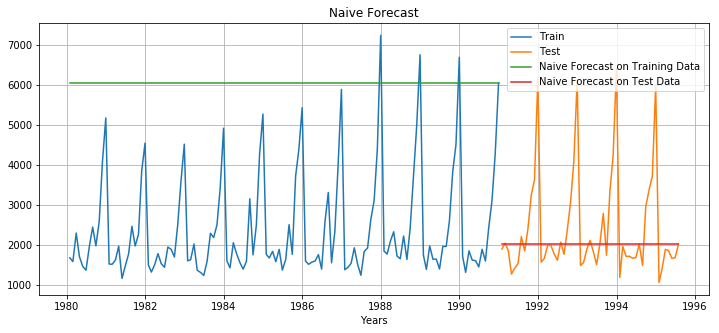

In [46]:
plt.figure(figsize=(12,5))
plt.plot(train_Sparkling['Sparkling'], label='Train')
plt.plot(test_Sparkling['Sparkling'], label='Test')
plt.plot(NaiveModel_train_Sparkling['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test_Sparkling['naive'], label='Naive Forecast on Test Data')
plt.xlabel("Years")
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

###### Model Evaluation of Naive Bayes Model

In [47]:
## Training Data - RMSE and MAPE

rmse_model2_train_Sparkling = metrics.mean_squared_error(train_Sparkling['Sparkling'],NaiveModel_train_Sparkling['naive'],squared=False)
mape_model2_train_Sparkling = MAPE(train_Sparkling['Sparkling'],NaiveModel_train_Sparkling['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_train_Sparkling, mape_model2_train_Sparkling))

For Naive Model forecast on the Training Data,  RMSE is 3867.701 and MAPE is 153.17


In [48]:
## Test Data - RMSE and MAPE
rmse_model2_test_Sparkling = metrics.mean_squared_error(test_Sparkling['Sparkling'],NaiveModel_test_Sparkling['naive'],squared=False)
mape_model2_test_Sparkling = MAPE(test_Sparkling['Sparkling'],NaiveModel_test_Sparkling['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_test_Sparkling, mape_model2_test_Sparkling))

For RegressionOnTime forecast on the Test Data,  RMSE is 1327.156 and MAPE is 32.90


In [49]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test_Sparkling],'Test MAPE': [mape_model2_test_Sparkling]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15
NaiveModel,1327.156057,32.90


### Model 3: Simple Average

###### For this particular simple average method, we will forecast by using the average of the training values

In [50]:
SimpleAverage_train_Sparkling = train_Sparkling.copy()
SimpleAverage_test_Sparkling = test_Sparkling.copy()

In [51]:
SimpleAverage_train_Sparkling['mean_forecast'] = train_Sparkling['Sparkling'].mean()
SimpleAverage_train_Sparkling.head()

,Sparkling,mean_forecast
YearMonth,,
1980-01-31,1686,2403.780303
1980-02-29,1591,2403.780303
1980-03-31,2304,2403.780303
1980-04-30,1712,2403.780303
1980-05-31,1471,2403.780303


In [52]:
SimpleAverage_test_Sparkling['mean_forecast'] = test_Sparkling['Sparkling'].mean()
SimpleAverage_test_Sparkling.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-31,1902,2399.145455
1991-02-28,2049,2399.145455
1991-03-31,1874,2399.145455
1991-04-30,1279,2399.145455
1991-05-31,1432,2399.145455


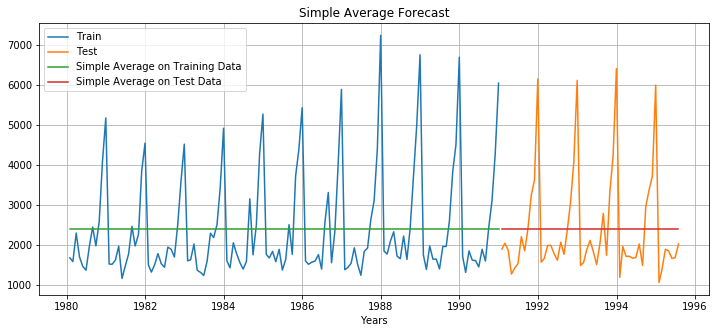

In [53]:
plt.figure(figsize=(12,5))
plt.plot(SimpleAverage_train_Sparkling['Sparkling'], label='Train')
plt.plot(SimpleAverage_test_Sparkling['Sparkling'], label='Test')
plt.plot(SimpleAverage_train_Sparkling['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test_Sparkling['mean_forecast'], label='Simple Average on Test Data')
plt.xlabel("Years")
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [54]:
## Training Data - RMSE and MAPE

rmse_model3_train_Sparkling = metrics.mean_squared_error(train_Sparkling['Sparkling'],SimpleAverage_train_Sparkling['mean_forecast'],squared=False)
mape_model3_train_Sparkling = MAPE(train_Sparkling['Sparkling'],SimpleAverage_train_Sparkling['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_train_Sparkling, mape_model3_train_Sparkling))

For Simple Average Model forecast on the Training Data,  RMSE is 1298.484 and MAPE is 40.36


In [55]:
## Test Data - RMSE and MAPE

rmse_model3_test_Sparkling = metrics.mean_squared_error(test_Sparkling['Sparkling'],SimpleAverage_test_Sparkling['mean_forecast'],squared=False)
mape_model3_test_Sparkling = MAPE(test_Sparkling['Sparkling'],SimpleAverage_test_Sparkling['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_test_Sparkling, mape_model3_test_Sparkling))

For Simple Average forecast on the Test Data,  RMSE is 1275.073 and MAPE is 38.81


In [56]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test_Sparkling],'Test MAPE': [mape_model3_test_Sparkling]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15
NaiveModel,1327.156057,32.90
SimpleAverageModel,1275.073380,38.81


### Model 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [57]:
MovingAverage_Sparkling = df_Sparkling.copy()
MovingAverage_Sparkling.head()

,Sparkling
YearMonth,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [58]:
MovingAverage_Sparkling['Trailing_2'] = MovingAverage_Sparkling['Sparkling'].rolling(2).mean()
MovingAverage_Sparkling['Trailing_4'] = MovingAverage_Sparkling['Sparkling'].rolling(4).mean()
MovingAverage_Sparkling['Trailing_6'] = MovingAverage_Sparkling['Sparkling'].rolling(6).mean()
MovingAverage_Sparkling['Trailing_9'] = MovingAverage_Sparkling['Sparkling'].rolling(9).mean()
MovingAverage_Sparkling.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


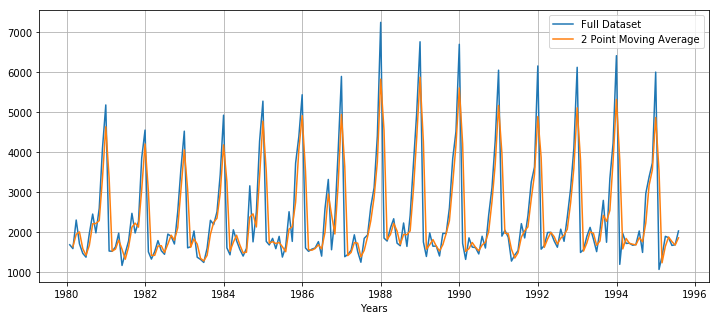

In [59]:
## Plotting on the whole data
plt.figure(figsize=(12,5))
plt.plot(MovingAverage_Sparkling['Sparkling'], label='Full Dataset')
plt.plot(MovingAverage_Sparkling['Trailing_2'], label='2 Point Moving Average')
plt.xlabel("Years")
plt.legend(loc = 'best')
plt.grid();

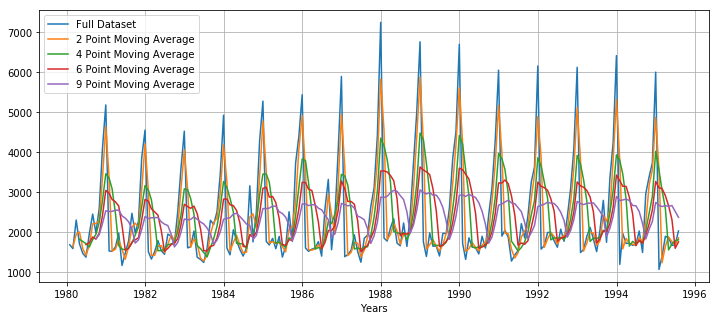

In [60]:
plt.figure(figsize=(12,5))
plt.plot(MovingAverage_Sparkling['Sparkling'], label='Full Dataset')
plt.plot(MovingAverage_Sparkling['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_9'],label = '9 Point Moving Average')
plt.xlabel("Years")
plt.legend(loc = 'best')
plt.grid();

In [61]:
#Creating train and test set 
trailing_MovingAverage_train_Sparkling=MovingAverage_Sparkling[0:int(len(MovingAverage_Sparkling)*0.7)] 
trailing_MovingAverage_test_Sparkling=MovingAverage_Sparkling[int(len(MovingAverage_Sparkling)*0.7):]

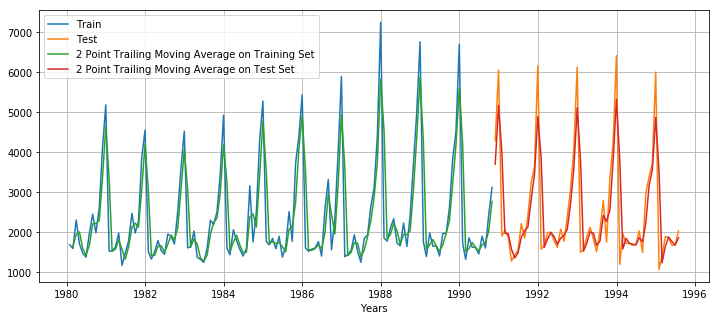

In [62]:
## Plotting on both the Training and Test data
plt.figure(figsize=(12,5))
plt.plot(trailing_MovingAverage_train_Sparkling['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test_Sparkling['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_train_Sparkling['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test_Sparkling['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.xlabel("Years")
plt.legend(loc='best')
plt.grid()

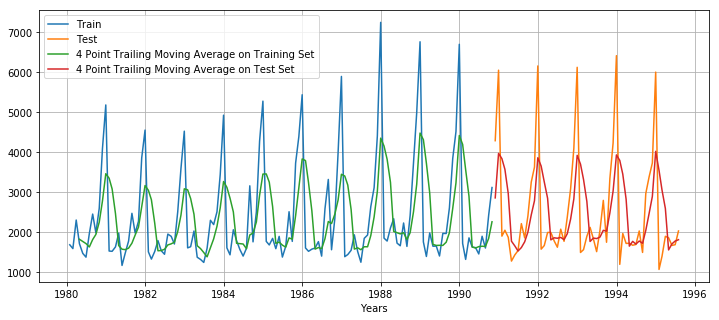

In [63]:
plt.figure(figsize=(12,5))
plt.plot(trailing_MovingAverage_train_Sparkling['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test_Sparkling['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_train_Sparkling['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test_Sparkling['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.xlabel("Years")
plt.legend(loc='best')
plt.grid()

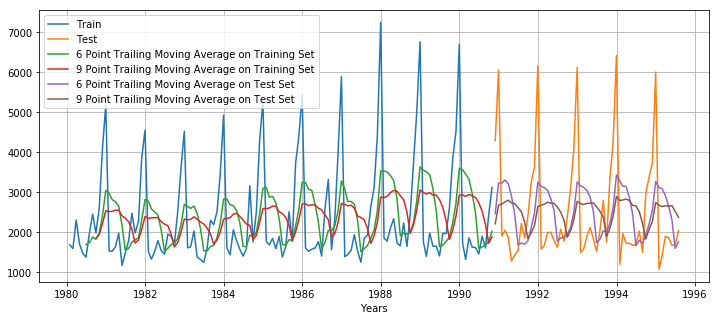

In [64]:
plt.figure(figsize=(12,5))
plt.plot(trailing_MovingAverage_train_Sparkling['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test_Sparkling['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_train_Sparkling['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_Sparkling['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test_Sparkling['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_Sparkling['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.xlabel("Years")
plt.legend(loc='best')
plt.grid()

In [65]:
trailing_MovingAverage_test_Sparkling.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1990-11-30,4286,3701.0,2857.75,2464.500000,2209.888889
1990-12-31,6047,5166.5,3968.25,3229.500000,2675.222222
1991-01-31,1902,3974.5,3837.75,3230.000000,2705.666667
1991-02-28,2049,1975.5,3571.00,3304.000000,2753.888889
1991-03-31,1874,1961.5,2968.00,3212.333333,2800.222222


###### Model Evaluation on moving average

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2_Sparkling = mean_squared_error(test_Sparkling['Sparkling'],trailing_MovingAverage_test_Sparkling['Trailing_2'][2:],squared=False)
mape_model4_test_2_Sparkling = MAPE(test_Sparkling['Sparkling'],trailing_MovingAverage_test_Sparkling['Trailing_2'][2:])
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_2_Sparkling, mape_model4_test_2_Sparkling))## Test Data - RMSE and MAPE --> 4 point Trailing MA

## Test Data - RMSE and MAPE --> 4 point Trailing MA
rmse_model4_test_4_Sparkling = metrics.mean_squared_error(test_Sparkling['Sparkling'],trailing_MovingAverage_test_Sparkling['Trailing_4'][2:],squared=False)
mape_model4_test_4_Sparkling = MAPE(test_Sparkling['Sparkling'],trailing_MovingAverage_test_Sparkling['Trailing_4'][2:])
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_4_Sparkling, mape_model4_test_4_Sparkling))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6_Sparkling = metrics.mean_squared_error(test_Sparkling['Sparkling'],trailing_MovingAverage_test_Sparkling['Trailing_6'][2:],squared=False)
mape_model4_test_6_Sparkling = MAPE(test_Sparkling['Sparkling'],trailing_MovingAverage_test_Sparkling['Trailing_6'][2:])
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_6_Sparkling, mape_model4_test_6_Sparkling))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9_Sparkling = metrics.mean_squared_error(test_Sparkling['Sparkling'],trailing_MovingAverage_test_Sparkling['Trailing_9'][2:],squared=False)
mape_model4_test_9_Sparkling = MAPE(test_Sparkling['Sparkling'],trailing_MovingAverage_test_Sparkling['Trailing_9'][2:])
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_9_Sparkling, mape_model4_test_9_Sparkling))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 813.401 and MAPE is 19.70
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 1156.590 and MAPE is 35.96
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 1283.927 and MAPE is 43.86
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 1346.278 and MAPE is 46.86


In [68]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2_Sparkling,rmse_model4_test_4_Sparkling
                                          ,rmse_model4_test_6_Sparkling,rmse_model4_test_9_Sparkling]
                            ,'Test MAPE': [mape_model4_test_2_Sparkling,mape_model4_test_4_Sparkling,mape_model4_test_6_Sparkling
                                           ,mape_model4_test_9_Sparkling]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15
NaiveModel,1327.156057,32.90
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86


### Method 5: Simple Exponential Smoothing

In [69]:
from statsmodels.tsa.api import SimpleExpSmoothing,Holt,ExponentialSmoothing

In [70]:
SES_train_Sparkling = train_Sparkling.copy()
SES_test_Sparkling = test_Sparkling.copy()

In [71]:
model_SES = SimpleExpSmoothing(SES_train_Sparkling['Sparkling'])
model_SES_Sparkling = model_SES.fit(optimized=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [72]:
model_SES_Sparkling.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7786728672204,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
print('== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==')
print('')
print('Smoothing Level', np.round(model_SES_Sparkling.params['smoothing_level'], 4))
print('Initial Level', np.round(model_SES_Sparkling.params['initial_level'], 4))
print('')
SES_test_Sparkling['predict'] = model_SES_Sparkling.forecast(steps=len(test_Sparkling))
SES_test_Sparkling.head()

== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==

Smoothing Level 0.0
Initial Level 2403.7787



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


,Sparkling,predict
YearMonth,,
1991-01-31,1902,2403.778673
1991-02-28,2049,2403.778673
1991-03-31,1874,2403.778673
1991-04-30,1279,2403.778673
1991-05-31,1432,2403.778673


In [74]:
y_pred1_Sparkling=model_SES_Sparkling.predict(start=SES_train_Sparkling['Sparkling'].index[0])

In [75]:
test_forecast_Sparkling=model_SES_Sparkling.forecast(steps=len(SES_test_Sparkling['Sparkling']))

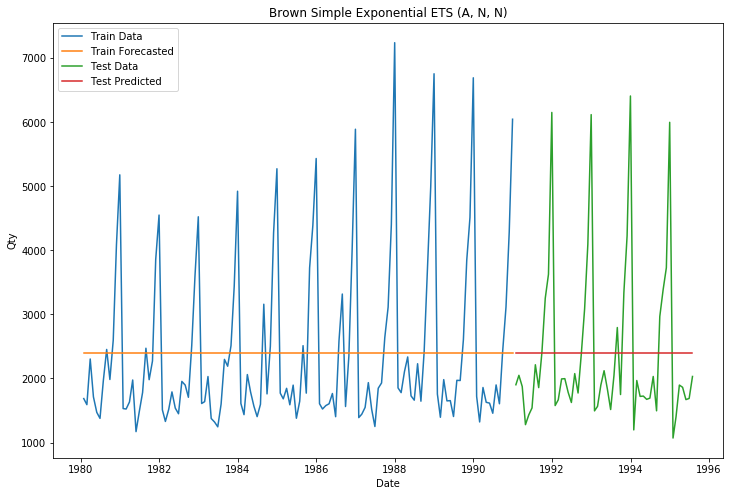

In [76]:
fig1, ax = plt.subplots()
ax.plot(SES_train_Sparkling['Sparkling'], label = 'Train Data')
ax.plot(y_pred1_Sparkling, label = 'Train Forecasted')
ax.plot(SES_test_Sparkling['Sparkling'],label='Test Data')
ax.plot(test_forecast_Sparkling,label='Test Predicted')
plt.legend(loc = 'upper left')
plt.title('Brown Simple Exponential ETS (A, N, N)')
plt.ylabel('Qty')
plt.xlabel('Date')
plt.show()

In [77]:
## Training Data

rmse_model5_train_1_Sparkling = mean_squared_error(SES_train_Sparkling['Sparkling'],y_pred1_Sparkling,squared=False)
mape_model5_train_1_Sparkling = MAPE(SES_train_Sparkling['Sparkling'],y_pred1_Sparkling)
print("For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model5_train_1_Sparkling, mape_model5_train_1_Sparkling))

For Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1298.484 and MAPE is 40.36


In [78]:
## Test Data

rmse_model5_test_1_Sparkling = mean_squared_error(SES_test_Sparkling['Sparkling'],test_forecast_Sparkling,squared=False)
mape_model5_test_1_Sparkling = MAPE(SES_test_Sparkling['Sparkling'],test_forecast_Sparkling)
print("For Alpha =0 Simple Exponential Smoothing Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model5_test_1_Sparkling, mape_model5_test_1_Sparkling))

For Alpha =0 Simple Exponential Smoothing Model forecast on the Testing Data,  RMSE is 1275.082 and MAPE is 38.90


In [79]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1_Sparkling],'Test MAPE': [mape_model5_test_1_Sparkling]}
                           ,index=['Alpha=0,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15
NaiveModel,1327.156057,32.90
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081798,38.90


In [80]:

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [81]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False)
    SES_train_Sparkling['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test_Sparkling['predict',i] = model_SES_alpha_i.forecast(steps=12)
    
    rmse_model5_train_i_Sparkling = metrics.mean_squared_error(SES_train_Sparkling['Sparkling'],SES_train_Sparkling['predict',i])

    rmse_model5_test_i_Sparkling = metrics.mean_squared_error(SES_test_Sparkling['Sparkling'],SES_test_Sparkling['predict'])

    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i_Sparkling 
                                      ,'Test RMSE':rmse_model5_test_i_Sparkling}, ignore_index=True)
    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

In [82]:
resultsDf_6 = resultsDf_6.sort_values(by="Test RMSE")
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE
0,0.3,1.848272e+06,1.625834e+06
1,0.4,1.829497e+06,1.625834e+06
2,0.5,1.806348e+06,1.625834e+06
3,0.6,1.792400e+06,1.625834e+06
4,0.7,1.792504e+06,1.625834e+06
5,0.8,1.807578e+06,1.625834e+06
6,0.9,1.837986e+06,1.625834e+06


In [83]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][2]]}
                           ,index=['Alpha=0.3,SingleExponentialSmoothingWithGrid'])

resultsDf_6_1

,Test RMSE
"Alpha=0.3,SingleExponentialSmoothingWithGrid",1.625834e+06


### Model 6: Double Exponential Smoothing (Holt's Model)

In [84]:
from statsmodels.tsa.api import ExponentialSmoothing,Holt

In [85]:
DES_train_Sparkling = train_Sparkling.copy()
DES_test_Sparkling = test_Sparkling.copy()

In [86]:
model_DES_new = Holt(DES_train_Sparkling['Sparkling'])
model_DES_new_Sparkling = model_DES_new.fit(smoothing_level= 0.01, smoothing_slope=0.01)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [87]:
model_DES_new_Sparkling.params

{'smoothing_level': 0.01,
 'smoothing_slope': 0.01,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2015.010536631007,
 'initial_slope': 5.807032214943793,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
model_DES_new_Sparkling.forecast(len(DES_test_Sparkling)).shape

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


(55,)

In [89]:
print('== Brown Double Exponential Smoothing ETS (A, A, N) Parameters ==')
print('')
print('Smoothing Level', np.round(model_DES_new_Sparkling.params['smoothing_level'], 4))
print('Initial Level', np.round(model_DES_new_Sparkling.params['initial_level'], 4))
print('')
DES_test_Sparkling['predict'] = model_DES_new_Sparkling.forecast(steps=len(test_Sparkling))
DES_test_Sparkling.head()

== Brown Double Exponential Smoothing ETS (A, A, N) Parameters ==

Smoothing Level 0.01
Initial Level 2015.0105



,Sparkling,predict
YearMonth,,
1991-01-31,1902,2789.014686
1991-02-28,2049,2794.850613
1991-03-31,1874,2800.686540
1991-04-30,1279,2806.522467
1991-05-31,1432,2812.358394


In [90]:

print("Train RMSE is ->",mean_squared_error(DES_train_Sparkling['Sparkling'],model_DES_new_Sparkling.fittedvalues,squared=False))
print("Train MAPE is ->",MAPE(DES_train_Sparkling['Sparkling'],model_DES_new_Sparkling.fittedvalues))

Train RMSE is -> 1285.9448360849685
Train MAPE is -> 40.38


In [91]:
rmse_model6_test_1_Sparkling = mean_squared_error(DES_test_Sparkling['Sparkling'],model_DES_new_Sparkling.forecast(steps=len(DES_test_Sparkling)),squared=False)
mape_model6_test_1_Sparkling = MAPE(DES_test_Sparkling['Sparkling'],model_DES_new_Sparkling.forecast(steps=len(DES_test_Sparkling)))

print("Test RMSE is ->",rmse_model6_test_1_Sparkling)
print("Test MAPE is ->",mape_model6_test_1_Sparkling)

Test RMSE is -> 1388.1298948092965
Test MAPE is -> 50.09


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

In [92]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1_Sparkling],'Test MAPE': [mape_model6_test_1_Sparkling]}
                           ,index=['Alpha=0.99,beta=0.01,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15
NaiveModel,1327.156057,32.90
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081798,38.90
"Alpha=0.99,beta=0.01,DoubleExponentialSmoothing",1388.129895,50.09


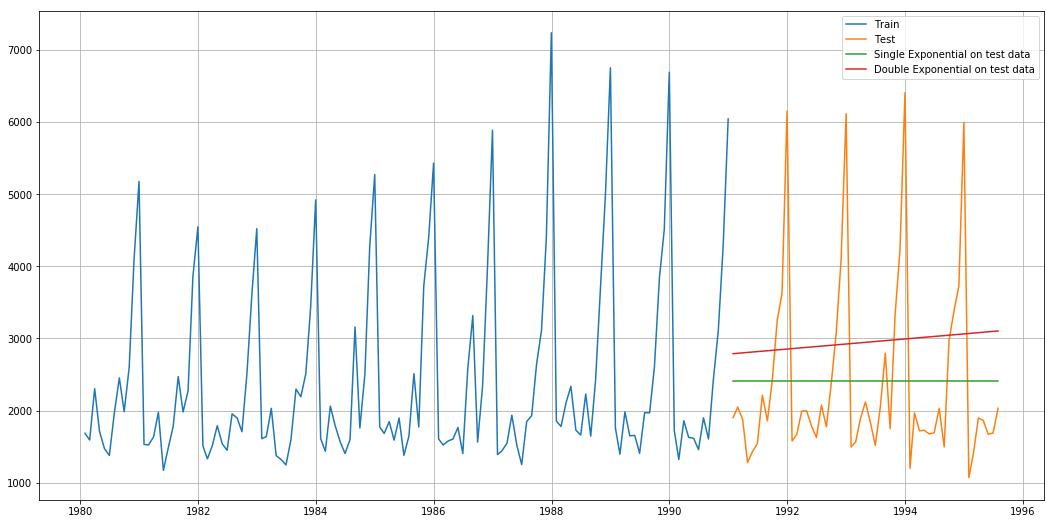

In [93]:
plt.figure(figsize=(18,9))
plt.plot(DES_train_Sparkling['Sparkling'], label='Train')
plt.plot(DES_test_Sparkling['Sparkling'], label='Test')

plt.plot(test_forecast_Sparkling, label='Single Exponential on test data')
plt.plot(model_DES_new_Sparkling.forecast(steps=len(DES_test_Sparkling)), label='Double Exponential on test data')


plt.legend(loc='best')
plt.grid();

In [94]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [95]:
for i in np.arange(0,1,0.1):
    for j in np.arange(0,1,0.1):
        model_DES_alpha_i_j = model_DES_new.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
        DES_train_Sparkling['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_Sparkling['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test_Sparkling['Sparkling']))

        rmse_model6_train = mean_squared_error(DES_train_Sparkling['Sparkling'],DES_train_Sparkling['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train_Sparkling['Sparkling'],DES_train_Sparkling['predict',i,j])

        rmse_model6_test = mean_squared_error(DES_test_Sparkling['Sparkling'],DES_test_Sparkling['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test_Sparkling['Sparkling'],DES_test_Sparkling['predict',i,j])
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train,'Train MAPE':mape_model6_train
                                          ,'Test RMSE':rmse_model6_test,'Test MAPE':mape_model6_test }, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [96]:
resultsDf_7.sort_values(by='Test MAPE').head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE,Test MAPE,Train MAPE
11,0.1,0.1,1382.520870,1778.564670,67.20,44.37
60,0.6,0.0,1353.081728,2004.479267,68.02,40.13
50,0.5,0.0,1363.627617,2046.410581,68.38,41.54
70,0.7,0.0,1349.696523,2024.922482,69.00,39.15
80,0.8,0.0,1352.968870,2080.557083,70.59,38.48


In [97]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothingWithGrid'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15
NaiveModel,1327.156057,32.90
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081798,38.90
"Alpha=0.99,beta=0.01,DoubleExponentialSmoothing",1388.129895,50.09
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothingWithGrid",1778.564670,67.20


### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)
Three parameters 𝛼 , 𝛽 and 𝛾 are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [98]:
TES_train_Sparkling = train_Sparkling.copy()
TES_test_Sparkling = test_Sparkling.copy()

In [99]:
model_TES = ExponentialSmoothing(TES_train_Sparkling['Sparkling'],seasonal_periods=3,trend='additive',seasonal="multiplicative",freq='M')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [100]:
model_TES_Sparkling = model_TES.fit(smoothing_level= 0.01, smoothing_slope=0.01,smoothing_seasonal=0.01)

In [101]:
model_TES_Sparkling.params

{'smoothing_level': 0.01,
 'smoothing_slope': 0.01,
 'smoothing_seasonal': 0.01,
 'damping_slope': nan,
 'initial_level': 2063.3631779423836,
 'initial_slope': 5.779628125188699,
 'initial_seasons': array([0.8356073 , 0.96222868, 1.1301695 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [102]:
TES_train_Sparkling['predict'] = model_TES_Sparkling.fittedvalues
TES_train_Sparkling.head()

,Sparkling,predict
YearMonth,,
1980-01-31,1686,1728.990835
1980-02-29,1591,1996.049879
1980-03-31,2304,2346.147908
1980-04-30,1712,1738.701518
1980-05-31,1471,2003.795846


In [103]:
## Prediction on the test data
TES_test_Sparkling['predict'] = model_TES_Sparkling.forecast(steps=len(TES_test_Sparkling['Sparkling']))
TES_test_Sparkling.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


,Sparkling,predict
YearMonth,,
1991-01-31,1902,2387.844924
1991-02-28,2049,2755.798116
1991-03-31,1874,3195.403080
1991-04-30,1279,2402.611531
1991-05-31,1432,2772.805115


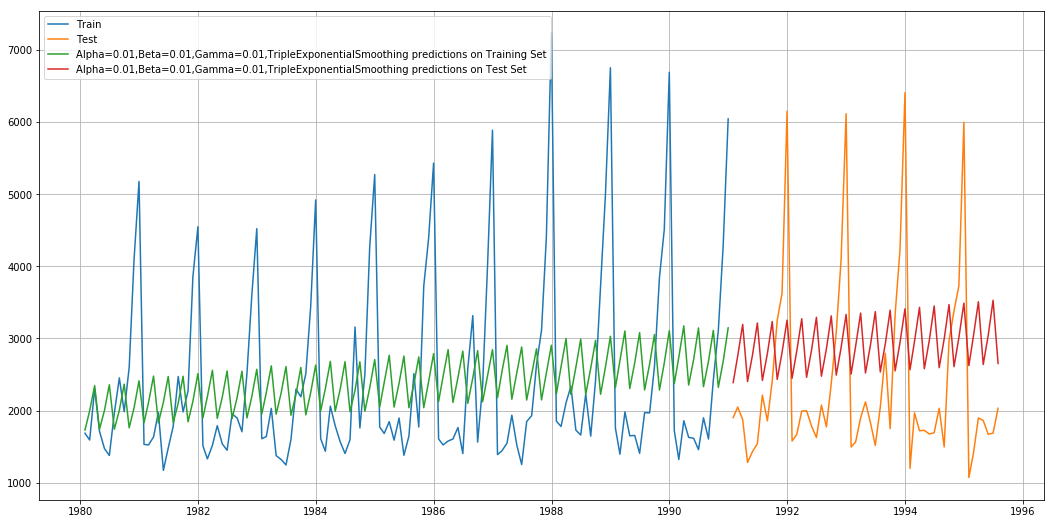

In [104]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_Sparkling['Sparkling'], label='Train')
plt.plot(TES_test_Sparkling['Sparkling'], label='Test')
plt.plot(TES_train_Sparkling['predict'], label='Alpha=0.01,Beta=0.01,Gamma=0.01,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test_Sparkling['predict'], label='Alpha=0.01,Beta=0.01,Gamma=0.01,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [105]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train_Sparkling['Sparkling'],TES_train_Sparkling['predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train_Sparkling['Sparkling'],TES_train_Sparkling['predict'])
print("For Alpha: 0.01,Beta: 0.01 and Gamma:0.01, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))


For Alpha: 0.01,Beta: 0.01 and Gamma:0.01, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 1257.887 MAPE is 40.80


In [106]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test_Sparkling['Sparkling'],TES_test_Sparkling['predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test_Sparkling['Sparkling'],TES_test_Sparkling['predict'])
print("For Alpha: 0.01,Beta: 0.01 and Gamma:0.01,Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.01,Beta: 0.01 and Gamma:0.01,Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 1339.779 MAPE is 49.34


In [107]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.01,Beta=0.01,Gamma=0.01,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15
NaiveModel,1327.156057,32.90
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081798,38.90
"Alpha=0.99,beta=0.01,DoubleExponentialSmoothing",1388.129895,50.09
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothingWithGrid",1778.564670,67.20


In [108]:

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [109]:
for i in np.arange(0.01,1,0.1):
    for j in np.arange(0.01,1,0.1):
        for k in np.arange(0.01,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
            TES_train_Sparkling['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_Sparkling['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test_Sparkling['Sparkling']))
        
            rmse_model8_train = mean_squared_error(TES_train_Sparkling['Sparkling'],TES_train_Sparkling['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train_Sparkling['Sparkling'],TES_train_Sparkling['predict',i,j,k])
        
            rmse_model8_test = mean_squared_error(TES_test_Sparkling['Sparkling'],TES_test_Sparkling['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test_Sparkling['Sparkling'],TES_test_Sparkling['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecat

In [110]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
41,0.01,0.41,0.11,1482.180431,47.82,1285.793066,45.65
70,0.01,0.71,0.01,1429.984221,46.58,1291.252161,45.55
91,0.01,0.91,0.11,1402.523316,45.67,1297.968447,46.32
200,0.21,0.01,0.01,1317.798492,42.15,1305.466942,44.92
81,0.01,0.81,0.11,1402.417016,45.57,1306.915859,47.08


In [111]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][5]],'Test MAPE': [resultsDf_8_2.sort_values(by=['Test MAPE']).values[0][6]]}
                           ,index=['Alpha=0.03,Beta=0.03,Gamma=0.03,TripleExponentialSmoothingWithGrid'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15
NaiveModel,1327.156057,32.90
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081798,38.90
"Alpha=0.99,beta=0.01,DoubleExponentialSmoothing",1388.129895,50.09
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothingWithGrid",1778.564670,67.20


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha(𝛼) = 0.05.

###### Null Hypothesis: p-value > 𝛼 (alpha value) -  then the data is not stationary
###### Alternate Hypothesis: p-value < 𝛼 (alpha value) - then the data is having stationarity

In [112]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    plt.figure(figsize=(14,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

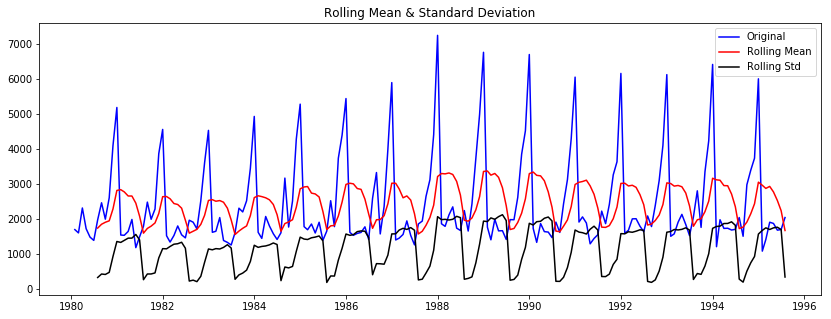

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [113]:
test_stationarity(df_Sparkling['Sparkling'])

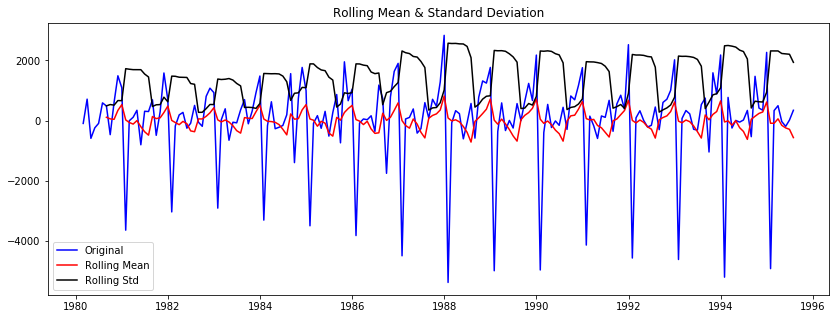

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [114]:
test_stationarity(df_Sparkling['Sparkling'].diff().dropna())

###### We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [115]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

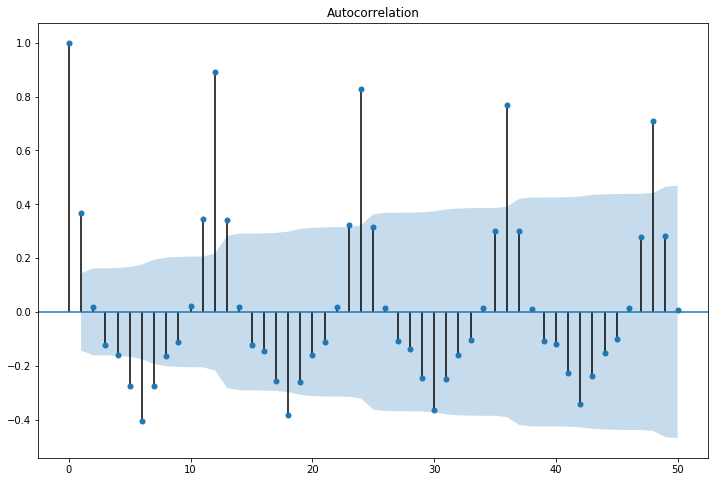

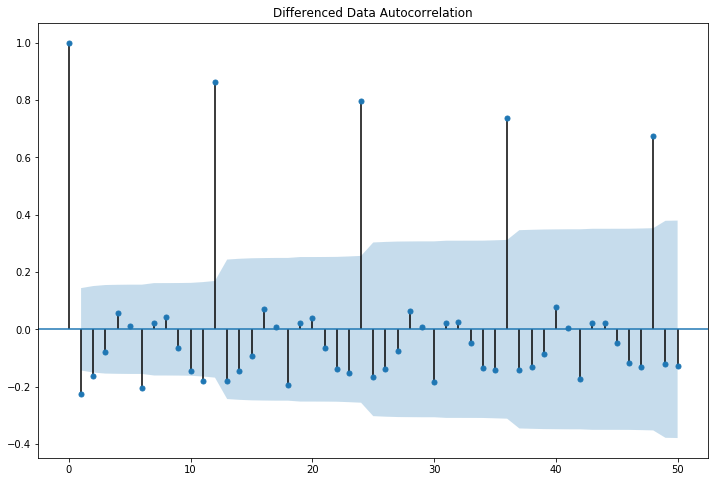

In [116]:
plot_acf(df_Sparkling['Sparkling'],lags=50)
plot_acf(df_Sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


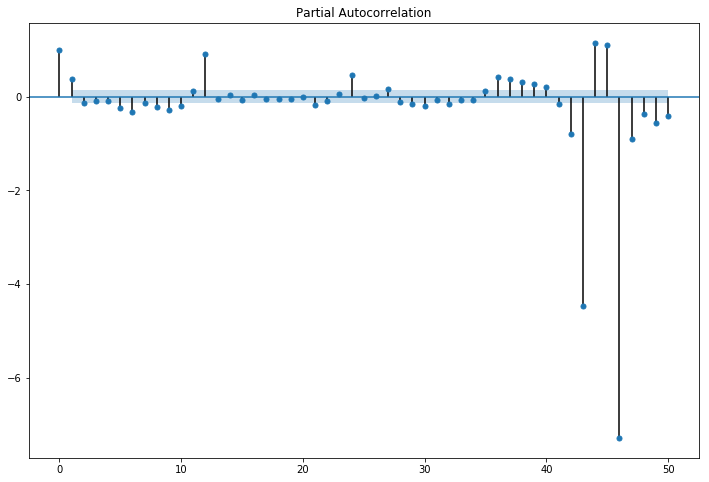

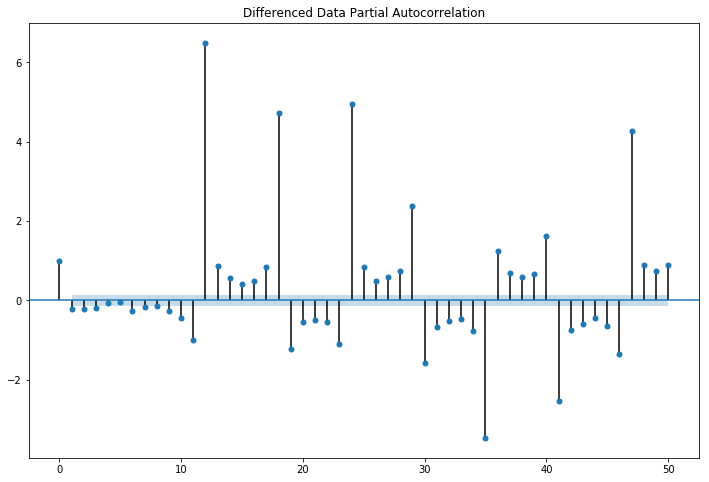

In [117]:
plot_pacf(df_Sparkling['Sparkling'],lags=50)
plot_pacf(df_Sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

Check for stationarity of the Training Data Time Series.


## Split the data into train and test and plot the training and test data.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [118]:
train_sparkling_stationarity=df_Sparkling[df_Sparkling.index.year < 1991]
test_sparkling_stationarity=df_Sparkling[df_Sparkling.index.year >= 1991]

In [119]:
from IPython.display import display

In [120]:
print('First few rows of Training Data')
display(train_sparkling_stationarity.head())
print('Last few rows of Training Data')
display(train_sparkling_stationarity.tail())
print('First few rows of Test Data')
display(test_sparkling_stationarity.head())
print('Last few rows of Test Data')
display(test_sparkling_stationarity.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
YearMonth,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


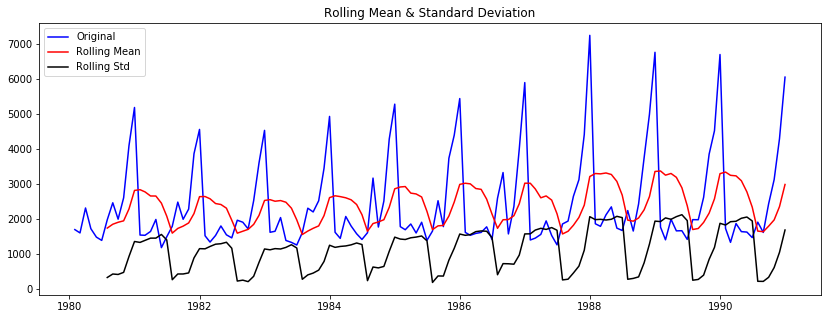

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [121]:
test_stationarity(train_sparkling_stationarity['Sparkling'])

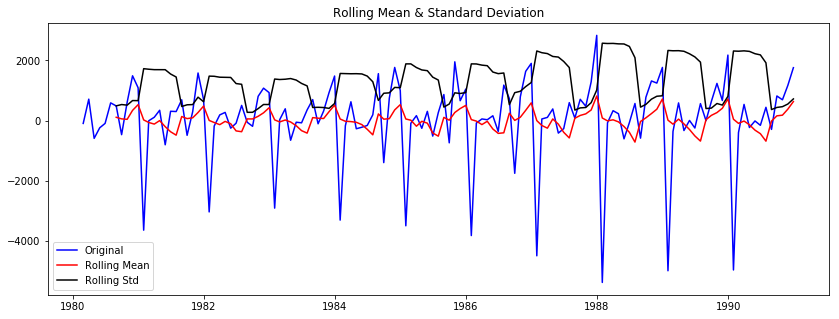

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [122]:
test_stationarity(train_sparkling_stationarity['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at 𝛼 = 0.05.

###### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [123]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [124]:
# Creating an empty Dataframe with column names only
ARIMA_AIC_sparkling = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_sparkling

,param,AIC


In [125]:
from statsmodels.tsa.arima_model import ARIMA

In [126]:
for param in pdq:
    try:
        ARIMA_model = ARIMA(train_sparkling_stationarity['Sparkling'].values,order=param).fit()
        print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
        ARIMA_AIC_sparkling = ARIMA_AIC_sparkling.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    except:
        continue

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906436793315
ARIMA(0, 1, 2) - AIC:2232.7830976841055
ARIMA(0, 1, 3) - AIC:2233.0166051371466
ARIMA(0, 1, 4) - AIC:2233.8017181420228
ARIMA(1, 1, 0) - AIC:2268.5280606338
ARIMA(1, 1, 1) - AIC:2235.0139453521197
ARIMA(1, 1, 2) - AIC:2233.597647119164
ARIMA(1, 1, 3) - AIC:2234.5741415468874
ARIMA(2, 1, 0) - AIC:2262.0356001527553
ARIMA(2, 1, 1) - AIC:2232.3604898985964


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2) - AIC:2210.6193309629207
ARIMA(2, 1, 3) - AIC:2229.3580937707193


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


ARIMA(3, 1, 0) - AIC:2259.4715550550227
ARIMA(3, 1, 1) - AIC:2233.921759734045


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(3, 1, 2) - AIC:2228.9272866025426


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(3, 1, 3) - AIC:2225.661558524987


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(3, 1, 4) - AIC:2226.054855756679
ARIMA(4, 1, 0) - AIC:2261.46815546755
ARIMA(4, 1, 1) - AIC:2235.131466031664
ARIMA(4, 1, 2) - AIC:2230.897066502834


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:632: RuntimeWarning: invalid value encountered in double_scalars
  (1-a**2)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:634: RuntimeWarning: divide by zero encountered in true_divide
  invarcoefs = -np.log((1-params)/(1+params))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


In [127]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC_sparkling.sort_values(by='AIC',ascending=True)

,param,AIC
11,"(2, 1, 2)",2210.619331
16,"(3, 1, 3)",2225.661559
17,"(3, 1, 4)",2226.054856
15,"(3, 1, 2)",2228.927287
12,"(2, 1, 3)",2229.358094
20,"(4, 1, 2)",2230.897067
10,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
3,"(0, 1, 3)",2233.016605
7,"(1, 1, 2)",2233.597647


In [128]:
mod_sparkling = ARIMA(train_sparkling_stationarity['Sparkling'], order=(2,1,2),freq='M')

results_Arima_sparkling = mod_sparkling.fit()

print(results_Arima_sparkling.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.310
Method:                       css-mle   S.D. of innovations           1012.858
Date:                Sun, 20 Feb 2022   AIC                           2210.619
Time:                        22:08:34   BIC                           2227.871
Sample:                    02-29-1980   HQIC                          2217.629
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.517     10.803      0.000       4.572       6.599
ar.L1.D.Sparkling     1.2699      0.075     17.045      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


###### Predict on the Test Set using this model and evaluate the model.

In [129]:
predicted_arima_sparkling = results_Arima_sparkling.forecast(steps=len(test_sparkling_stationarity))

In [130]:
test_rmse_arima_sparkling = mean_squared_error(test_sparkling_stationarity['Sparkling'],predicted_arima_sparkling[0],squared=False)
test_mape_arima_sparkling = MAPE(test_sparkling_stationarity['Sparkling'],predicted_arima_sparkling[0])
print("Test rmse for arima is ",test_rmse_arima_sparkling)
print("Test mape for arima is ",test_mape_arima_sparkling)

Test rmse for arima is  1374.5293608813515
Test mape for arima is  48.36


In [131]:
resultsDf_9 = pd.DataFrame({'Test RMSE': test_rmse_arima_sparkling,'Test MAPE':test_mape_arima_sparkling}
                           ,index=['Arima 2,1,2'])
resultsDf_9

,Test RMSE,Test MAPE
"Arima 2,1,2",1374.529361,48.36


In [132]:
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15
NaiveModel,1327.156057,32.90
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081798,38.90
"Alpha=0.99,beta=0.01,DoubleExponentialSmoothing",1388.129895,50.09
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothingWithGrid",1778.564670,67.20


###### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [133]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = P = Q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [134]:
SARIMA_AIC_sparkling = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_sparkling

,param,seasonal,AIC


In [135]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        try:
            SARIMA_model_sparkling = sm.tsa.statespace.SARIMAX(train_sparkling_stationarity['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results_SARIMA_sparkling = SARIMA_model_sparkling.fit(maxiter=1000)
            print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_sparkling.aic))
            SARIMA_AIC_sparkling = SARIMA_AIC_sparkling.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_sparkling.aic}, ignore_index=True)
        except:
            continue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616843744
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640237703


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(0, 0, 3, 12)7 - AIC:3825.745688723207
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.99053013884
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735792217


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(1, 0, 3, 12)7 - AIC:4042.4340883232553
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158570938
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920763


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 3, 12)7 - AIC:4112.472891824418
SARIMA(0, 1, 0)x(3, 0, 0, 12)7 - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12)7 - AIC:1469.1871052625693
SARIMA(0, 1, 0)x(3, 0, 2, 12)7 - AIC:1471.0594530065025


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(3, 0, 3, 12)7 - AIC:3436.4464093171773
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.768864956638
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.7089572886352


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(0, 0, 3, 12)7 - AIC:3582.767569492356
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881838505
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.090319375664
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.150914442579


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954175973
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245085186992
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.4018825282335


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 0, 3, 12)7 - AIC:3169.6585624117465
SARIMA(0, 1, 1)x(3, 0, 0, 12)7 - AIC:1428.4607679617322
SARIMA(0, 1, 1)x(3, 0, 1, 12)7 - AIC:1428.8727987685324
SARIMA(0, 1, 1)x(3, 0, 2, 12)7 - AIC:1429.5891873768721


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(3, 0, 3, 12)7 - AIC:3164.945437268941
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:2187.4410101687513
SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:1887.912800720008
SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:1659.8789890443413


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(0, 0, 3, 12)7 - AIC:4197.1634302004695
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:1790.032633226859
SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:1724.1675074595375
SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:1557.1605068187705
SARIMA(0, 1, 2)x(1, 0, 3, 12)7 - AIC:7515.462334849937
SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:1603.9654774452229
SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:1600.543880716575
SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:1557.1215632395745


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(2, 0, 3, 12)7 - AIC:3791.0021058786174
SARIMA(0, 1, 2)x(3, 0, 0, 12)7 - AIC:1428.5993407922672
SARIMA(0, 1, 2)x(3, 0, 1, 12)7 - AIC:1429.744838902653
SARIMA(0, 1, 2)x(3, 0, 2, 12)7 - AIC:1430.6883833973343


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(3, 0, 3, 12)7 - AIC:3471.787235181932
SARIMA(0, 1, 3)x(0, 0, 0, 12)7 - AIC:2168.092540843811
SARIMA(0, 1, 3)x(0, 0, 1, 12)7 - AIC:1873.9770687190403
SARIMA(0, 1, 3)x(0, 0, 2, 12)7 - AIC:1643.2973661018395


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(0, 0, 3, 12)7 - AIC:3237.5948580204245
SARIMA(0, 1, 3)x(1, 0, 0, 12)7 - AIC:1792.030149466074
SARIMA(0, 1, 3)x(1, 0, 1, 12)7 - AIC:1710.6404078012022
SARIMA(0, 1, 3)x(1, 0, 2, 12)7 - AIC:1542.741897781814


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(0, 1, 3)x(2, 0, 0, 12)7 - AIC:1604.5715807567642
SARIMA(0, 1, 3)x(2, 0, 1, 12)7 - AIC:1601.067480856142
SARIMA(0, 1, 3)x(2, 0, 2, 12)7 - AIC:1543.04889351159


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(2, 0, 3, 12)7 - AIC:2649.2473665649036
SARIMA(0, 1, 3)x(3, 0, 0, 12)7 - AIC:1429.6529446295049
SARIMA(0, 1, 3)x(3, 0, 1, 12)7 - AIC:1441.1435175871052
SARIMA(0, 1, 3)x(3, 0, 2, 12)7 - AIC:1431.1487509843034


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(3, 0, 3, 12)7 - AIC:2494.8682061293184
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:1954.3938339903743
SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:1721.2688476355443


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(0, 0, 3, 12)7 - AIC:3795.3642540573705
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:1811.2440279330385
SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:1788.534359268462
SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:1616.4894402589664


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(1, 0, 3, 12)7 - AIC:6967.953495203131
SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:1621.6355080129188
SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:1617.135613267046
SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:1616.5412067538466


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(2, 0, 3, 12)7 - AIC:3389.396517953121
SARIMA(1, 1, 0)x(3, 0, 0, 12)7 - AIC:1440.513464037126
SARIMA(1, 1, 0)x(3, 0, 1, 12)7 - AIC:1442.1719780315304
SARIMA(1, 1, 0)x(3, 0, 2, 12)7 - AIC:1443.7660393143674


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(3, 0, 3, 12)7 - AIC:3381.227757826935
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:2204.934049154569
SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:1907.3558974133925
SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:1678.098135265556
SARIMA(1, 1, 1)x(0, 0, 3, 12)7 - AIC:3954.947728653268
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:1775.1424470061581
SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:1739.7167470335444
SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:1571.324886648479
SARIMA(1, 1, 1)x(1, 0, 3, 12)7 - AIC:7180.700701918046
SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:1590.6161606876244
SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:1586.314061452666
SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:1571.8069977649243


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 0, 3, 12)7 - AIC:3243.7628705666943
SARIMA(1, 1, 1)x(3, 0, 0, 12)7 - AIC:1414.9112073773
SARIMA(1, 1, 1)x(3, 0, 1, 12)7 - AIC:1415.9502486575825
SARIMA(1, 1, 1)x(3, 0, 2, 12)7 - AIC:1416.7958954700289
SARIMA(1, 1, 1)x(3, 0, 3, 12)7 - AIC:3248.4423170442856
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:2188.4633450504143
SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:1889.7708307497746
SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:1659.6291421459428


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(0, 0, 3, 12)7 - AIC:4443.88790568018
SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:1771.8259799204907
SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:1723.9871800298279
SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:1555.5842477878189
SARIMA(1, 1, 2)x(1, 0, 3, 12)7 - AIC:7111.71075200995
SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:1588.4216932200745
SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:1585.5140775682087
SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:1555.9345670944035


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 3, 12)7 - AIC:4039.482008029108
SARIMA(1, 1, 2)x(3, 0, 0, 12)7 - AIC:1413.809636030138
SARIMA(1, 1, 2)x(3, 0, 1, 12)7 - AIC:1414.914697208131
SARIMA(1, 1, 2)x(3, 0, 2, 12)7 - AIC:1415.966290226373


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(3, 0, 3, 12)7 - AIC:4031.151998378686
SARIMA(1, 1, 3)x(0, 0, 0, 12)7 - AIC:2171.026403977585
SARIMA(1, 1, 3)x(0, 0, 1, 12)7 - AIC:1869.9381449537857
SARIMA(1, 1, 3)x(0, 0, 2, 12)7 - AIC:1646.5176681399894


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(0, 0, 3, 12)7 - AIC:3446.931845686392
SARIMA(1, 1, 3)x(1, 0, 0, 12)7 - AIC:1772.3921599604296
SARIMA(1, 1, 3)x(1, 0, 1, 12)7 - AIC:1711.955488687211
SARIMA(1, 1, 3)x(1, 0, 2, 12)7 - AIC:1542.574459399125
SARIMA(1, 1, 3)x(1, 0, 3, 12)7 - AIC:7024.00172942847
SARIMA(1, 1, 3)x(2, 0, 0, 12)7 - AIC:1590.415405901999
SARIMA(1, 1, 3)x(2, 0, 1, 12)7 - AIC:1587.3668970261917
SARIMA(1, 1, 3)x(2, 0, 2, 12)7 - AIC:1543.0972982178516


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(2, 0, 3, 12)7 - AIC:3057.7642582538842
SARIMA(1, 1, 3)x(3, 0, 0, 12)7 - AIC:1415.7723337148545
SARIMA(1, 1, 3)x(3, 0, 1, 12)7 - AIC:1416.7509756971738
SARIMA(1, 1, 3)x(3, 0, 2, 12)7 - AIC:1417.7649243857932


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(3, 0, 3, 12)7 - AIC:3071.859348736738
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:1946.4383435405996
SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:1711.4123039825631


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(0, 0, 3, 12)7 - AIC:3595.978231534169
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:1780.7646066060704
SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:1756.935734858767
SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:1600.970220394526
SARIMA(2, 1, 0)x(1, 0, 3, 12)7 - AIC:3905.7979077443733
SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:1592.2403464894778
SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:1587.63449859805
SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:1585.9191732864647


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 0, 3, 12)7 - AIC:3478.4233400387725
SARIMA(2, 1, 0)x(3, 0, 0, 12)7 - AIC:1411.9449728031689
SARIMA(2, 1, 0)x(3, 0, 1, 12)7 - AIC:1413.1017619915947
SARIMA(2, 1, 0)x(3, 0, 2, 12)7 - AIC:1414.1975642354566


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(3, 0, 3, 12)7 - AIC:2921.683073121226
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:2199.8586131454845
SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:1905.020949542925
SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:1675.423408033563


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(0, 0, 3, 12)7 - AIC:3054.6705158900413
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:1792.8234290364248
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:1740.0911250349814
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:1571.9888280357663


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:1577.1235060896897
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:1573.1595855800265
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:1572.3428679515475


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 0, 3, 12)7 - AIC:3529.9891130523993
SARIMA(2, 1, 1)x(3, 0, 0, 12)7 - AIC:1402.467331996075
SARIMA(2, 1, 1)x(3, 0, 1, 12)7 - AIC:1403.1307555011715
SARIMA(2, 1, 1)x(3, 0, 2, 12)7 - AIC:1403.8241329159503
SARIMA(2, 1, 1)x(3, 0, 3, 12)7 - AIC:3539.6748277355773
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:2176.868114642407
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:1892.237262570306
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:1661.5523434454753


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(0, 0, 3, 12)7 - AIC:3387.376614969287
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:1757.2140931398505
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:1725.6005729968904
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:1557.340402260986
SARIMA(2, 1, 2)x(1, 0, 3, 12)7 - AIC:7113.9810879355355
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:1576.045592258817
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:1573.5476003589754
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:1557.8401258304348


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 3, 12)7 - AIC:3119.24959562284
SARIMA(2, 1, 2)x(3, 0, 0, 12)7 - AIC:1401.4376149198606
SARIMA(2, 1, 2)x(3, 0, 1, 12)7 - AIC:1405.1433266215467
SARIMA(2, 1, 2)x(3, 0, 2, 12)7 - AIC:1403.4358950204366
SARIMA(2, 1, 2)x(3, 0, 3, 12)7 - AIC:3304.081203725062
SARIMA(2, 1, 3)x(0, 0, 0, 12)7 - AIC:2171.039588521255
SARIMA(2, 1, 3)x(0, 0, 1, 12)7 - AIC:1865.041098446486
SARIMA(2, 1, 3)x(0, 0, 2, 12)7 - AIC:1646.7072773389539


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(0, 0, 3, 12)7 - AIC:3847.288235379629
SARIMA(2, 1, 3)x(1, 0, 0, 12)7 - AIC:1757.8360060223372
SARIMA(2, 1, 3)x(1, 0, 1, 12)7 - AIC:1710.8242163654154
SARIMA(2, 1, 3)x(1, 0, 2, 12)7 - AIC:1543.9173504757496
SARIMA(2, 1, 3)x(1, 0, 3, 12)7 - AIC:7469.884332544307
SARIMA(2, 1, 3)x(2, 0, 0, 12)7 - AIC:1577.6981500098582
SARIMA(2, 1, 3)x(2, 0, 1, 12)7 - AIC:1573.7195784787823
SARIMA(2, 1, 3)x(2, 0, 2, 12)7 - AIC:1543.9471466981008


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(2, 0, 3, 12)7 - AIC:3448.5649361633796
SARIMA(2, 1, 3)x(3, 0, 0, 12)7 - AIC:1402.9426638050084
SARIMA(2, 1, 3)x(3, 0, 1, 12)7 - AIC:1400.1291379944857
SARIMA(2, 1, 3)x(3, 0, 2, 12)7 - AIC:1401.2952679383375


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(3, 0, 3, 12)7 - AIC:3467.668645191518
SARIMA(3, 1, 0)x(0, 0, 0, 12)7 - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12)7 - AIC:1946.3686291419453
SARIMA(3, 1, 0)x(0, 0, 2, 12)7 - AIC:1709.5089923153039


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 0)x(0, 0, 3, 12)7 - AIC:3902.0228612346905
SARIMA(3, 1, 0)x(1, 0, 0, 12)7 - AIC:1762.7961104703436
SARIMA(3, 1, 0)x(1, 0, 1, 12)7 - AIC:1740.3783834027533
SARIMA(3, 1, 0)x(1, 0, 2, 12)7 - AIC:1600.047196944777
SARIMA(3, 1, 0)x(1, 0, 3, 12)7 - AIC:7110.109448569037
SARIMA(3, 1, 0)x(2, 0, 0, 12)7 - AIC:1578.2748025564756
SARIMA(3, 1, 0)x(2, 0, 1, 12)7 - AIC:1572.9330813757406
SARIMA(3, 1, 0)x(2, 0, 2, 12)7 - AIC:1571.6808202108741
SARIMA(3, 1, 0)x(2, 0, 3, 12)7 - AIC:3586.060208841602
SARIMA(3, 1, 0)x(3, 0, 0, 12)7 - AIC:1396.8678620482042
SARIMA(3, 1, 0)x(3, 0, 1, 12)7 - AIC:1397.6774712258402
SARIMA(3, 1, 0)x(3, 0, 2, 12)7 - AIC:1398.3074663130133


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 0)x(3, 0, 3, 12)7 - AIC:3452.6324339451103
SARIMA(3, 1, 1)x(0, 0, 0, 12)7 - AIC:2188.222098339798
SARIMA(3, 1, 1)x(0, 0, 1, 12)7 - AIC:1906.9690713698333
SARIMA(3, 1, 1)x(0, 0, 2, 12)7 - AIC:1677.423405124358
SARIMA(3, 1, 1)x(0, 0, 3, 12)7 - AIC:3940.2162802828407
SARIMA(3, 1, 1)x(1, 0, 0, 12)7 - AIC:1746.2222518273627
SARIMA(3, 1, 1)x(1, 0, 1, 12)7 - AIC:1727.100918659685
SARIMA(3, 1, 1)x(1, 0, 2, 12)7 - AIC:1573.6845021145596


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(1, 0, 3, 12)7 - AIC:nan
SARIMA(3, 1, 1)x(2, 0, 0, 12)7 - AIC:1564.9377505428824
SARIMA(3, 1, 1)x(2, 0, 1, 12)7 - AIC:1576.2956625655536
SARIMA(3, 1, 1)x(2, 0, 2, 12)7 - AIC:1576.3498154564768


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(2, 0, 3, 12)7 - AIC:3531.988287037913
SARIMA(3, 1, 1)x(3, 0, 0, 12)7 - AIC:1387.7883313822833
SARIMA(3, 1, 1)x(3, 0, 1, 12)7 - AIC:1388.6814841288067
SARIMA(3, 1, 1)x(3, 0, 2, 12)7 - AIC:1389.1959100022345


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(3, 0, 3, 12)7 - AIC:2732.8000977988527
SARIMA(3, 1, 2)x(0, 0, 0, 12)7 - AIC:2187.314727201944
SARIMA(3, 1, 2)x(0, 0, 1, 12)7 - AIC:1887.7804274328512
SARIMA(3, 1, 2)x(0, 0, 2, 12)7 - AIC:1659.625503822413


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2)x(0, 0, 3, 12)7 - AIC:3255.92098235071
SARIMA(3, 1, 2)x(1, 0, 0, 12)7 - AIC:1744.9635891207324
SARIMA(3, 1, 2)x(1, 0, 1, 12)7 - AIC:1727.3445026555376
SARIMA(3, 1, 2)x(1, 0, 2, 12)7 - AIC:1559.3372432538795
SARIMA(3, 1, 2)x(1, 0, 3, 12)7 - AIC:7576.433291280699
SARIMA(3, 1, 2)x(2, 0, 0, 12)7 - AIC:1564.2927032415078
SARIMA(3, 1, 2)x(2, 0, 1, 12)7 - AIC:1560.7899091228953
SARIMA(3, 1, 2)x(2, 0, 2, 12)7 - AIC:1559.809156298139
SARIMA(3, 1, 2)x(2, 0, 3, 12)7 - AIC:2877.891942951933
SARIMA(3, 1, 2)x(3, 0, 0, 12)7 - AIC:1401.0151309882806
SARIMA(3, 1, 2)x(3, 0, 1, 12)7 - AIC:1388.6026216203443
SARIMA(3, 1, 2)x(3, 0, 2, 12)7 - AIC:1389.701996360471


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2)x(3, 0, 3, 12)7 - AIC:2908.339045514362
SARIMA(3, 1, 3)x(0, 0, 0, 12)7 - AIC:2155.7749542047
SARIMA(3, 1, 3)x(0, 0, 1, 12)7 - AIC:1876.9311133305632
SARIMA(3, 1, 3)x(0, 0, 2, 12)7 - AIC:1643.7829948595445
SARIMA(3, 1, 3)x(0, 0, 3, 12)7 - AIC:6633.424012379096
SARIMA(3, 1, 3)x(1, 0, 0, 12)7 - AIC:1741.3823482535497
SARIMA(3, 1, 3)x(1, 0, 1, 12)7 - AIC:1851.680985075913
SARIMA(3, 1, 3)x(1, 0, 2, 12)7 - AIC:1544.393592823407
SARIMA(3, 1, 3)x(1, 0, 3, 12)7 - AIC:7025.6973854844655
SARIMA(3, 1, 3)x(2, 0, 0, 12)7 - AIC:1569.1444126200201
SARIMA(3, 1, 3)x(2, 0, 1, 12)7 - AIC:1566.5166102820742
SARIMA(3, 1, 3)x(2, 0, 2, 12)7 - AIC:1545.8371281977306


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(2, 0, 3, 12)7 - AIC:2733.8361362015658
SARIMA(3, 1, 3)x(3, 0, 0, 12)7 - AIC:1439.8833687935903
SARIMA(3, 1, 3)x(3, 0, 1, 12)7 - AIC:1393.1698975361035
SARIMA(3, 1, 3)x(3, 0, 2, 12)7 - AIC:1391.6926210616773
SARIMA(3, 1, 3)x(3, 0, 3, 12)7 - AIC:3341.8676983588425


In [136]:
SARIMA_AIC_sparkling.sort_values(by=['AIC']).head() 

,param,seasonal,AIC
220,"(3, 1, 1)","(3, 0, 0, 12)",1387.788331
237,"(3, 1, 2)","(3, 0, 1, 12)",1388.602622
221,"(3, 1, 1)","(3, 0, 1, 12)",1388.681484
222,"(3, 1, 1)","(3, 0, 2, 12)",1389.195910
238,"(3, 1, 2)","(3, 0, 2, 12)",1389.701996


In [137]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train_sparkling_stationarity['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_sparkling = mod.fit(maxiter=1000)
print(results_SARIMA_sparkling.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, 0, 12)   Log Likelihood                -685.894
Date:                            Sun, 20 Feb 2022   AIC                           1387.788
Time:                                    22:27:01   BIC                           1407.963
Sample:                                         0   HQIC                          1395.931
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.075      0.282      -0.133       0.456
ar.L2         -0.0928      0.150   

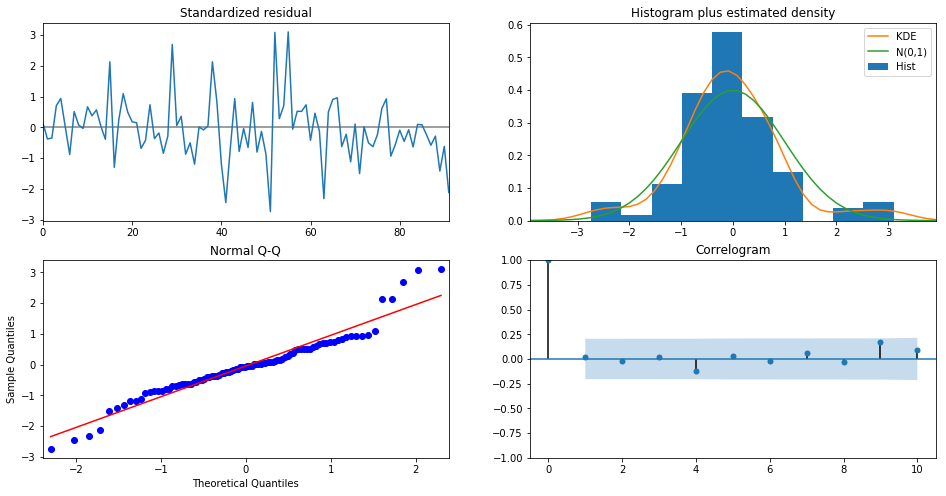

In [138]:
results_SARIMA_sparkling.plot_diagnostics(figsize=(16, 8))
plt.show()

###### Predict on the Test Set using this model and evaluate the model.

In [139]:
pred_test_SARIMA_sparkling = results_SARIMA_sparkling.get_forecast(steps=len(test_sparkling_stationarity))
pred_test_SARIMA_sparkling.predicted_mean

array([1389.35414447, 1224.67522784, 1673.34099324, 1533.30689195,
       1425.95174345, 1250.61621936, 1772.2263109 , 1479.1141852 ,
       2283.75791693, 3282.83196143, 4399.46839163, 6356.70652653,
       1314.29569047, 1039.22158027, 1562.6974022 , 1351.51410197,
       1286.72525869, 1091.64429923, 1627.98242717, 1381.98114896,
       2195.05961235, 3215.80153732, 4305.96847966, 6357.47526074,
       1178.25441918,  891.37159589, 1424.74088645, 1217.0725402 ,
       1149.22551055,  957.43755915, 1496.46611318, 1215.98706344,
       2068.45691365, 3064.13249883, 4232.11118064, 6299.20175084,
       1009.579547  ,  737.56140227, 1276.76541294, 1072.32991558,
        993.4792034 ,  794.85408648, 1356.18814625, 1067.93952173,
       1942.37115052, 2994.51917732, 4189.51258734, 6331.61300314,
        860.85887789,  570.90769989, 1131.98182785,  915.15083558,
        838.20706093,  632.24546072, 1210.35571855])

In [140]:
test_rmse_sarima_sparkling = mean_squared_error(test_sparkling_stationarity['Sparkling'],pred_test_SARIMA_sparkling.predicted_mean,squared=False)
test_mape_sarima_sparkling = MAPE(test_sparkling_stationarity['Sparkling'],pred_test_SARIMA_sparkling.predicted_mean)
print("Test rmse for sarima is ",test_rmse_sarima_sparkling)
print("Test mape for sarima is ",test_mape_sarima_sparkling)

Test rmse for sarima is  601.2393388459468
Test mape for sarima is  21.17


In [141]:
resultsDf_10 = pd.DataFrame({'Test RMSE': test_rmse_sarima_sparkling,'Test MAPE':test_mape_sarima_sparkling}
                           ,index=['SARIMA(3, 1, 1)(3, 0, 0, 12)'])
resultsDf_10

,Test RMSE,Test MAPE
"SARIMA(3, 1, 1)(3, 0, 0, 12)",601.239339,21.17


In [142]:
resultsDf = pd.concat([resultsDf,resultsDf_10])

resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15
NaiveModel,1327.156057,32.90
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081798,38.90
"Alpha=0.99,beta=0.01,DoubleExponentialSmoothing",1388.129895,50.09
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothingWithGrid",1778.564670,67.20


### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


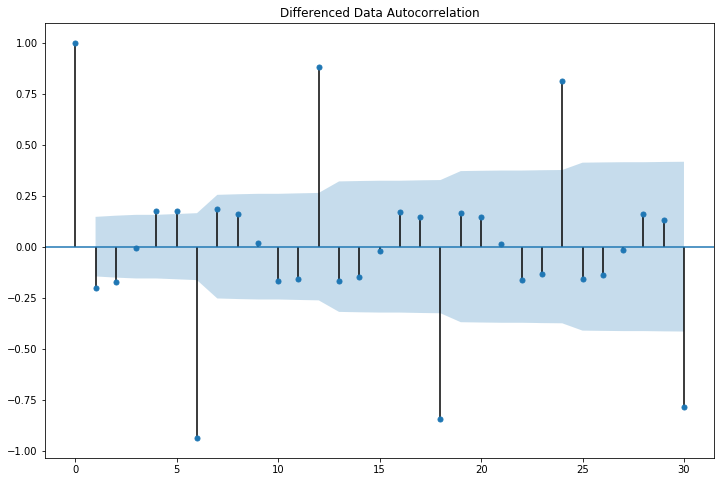

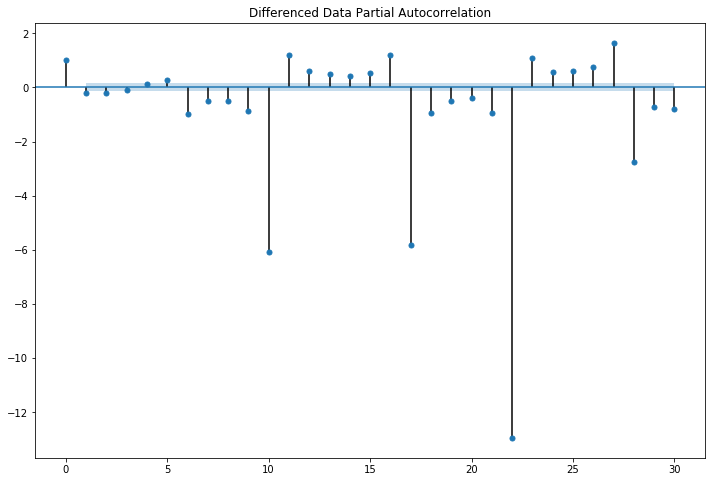

In [143]:
plot_acf((df_Sparkling['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf((df_Sparkling['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

Taking cut off points as SARIMA(2,1,2)(2,1,2, 12)

In [144]:
import statsmodels.api as sm

mod_sar = sm.tsa.statespace.SARIMAX(train_sparkling_stationarity['Sparkling'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2 ,1 ,2 , 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_new_Sparkling = mod_sar.fit(maxiter=1000)
print(results_SARIMA_new_Sparkling.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -684.814
Date:                            Sun, 20 Feb 2022   AIC                           1387.628
Time:                                    22:27:07   BIC                           1410.324
Sample:                                         0   HQIC                          1396.788
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5623      0.332     -1.695      0.090      -1.212       0.088
ar.L2          0.0325      0.167   

In [145]:
pred_test_SARIMA_new_Sparkling = results_SARIMA_new_Sparkling.get_forecast(steps=len(test_sparkling_stationarity))
pred_test_SARIMA_new_Sparkling.predicted_mean

array([1486.06575329, 1445.53344308, 1799.46261867, 1729.60673392,
       1561.67206174, 1427.44832941, 1904.33414197, 1662.16163031,
       2400.26361382, 3306.87496771, 4386.88262233, 6270.81556737,
       1530.99233787, 1364.77872122, 1790.28242024, 1658.3768708 ,
       1535.5845103 , 1378.97491418, 1867.11698994, 1646.46993087,
       2381.36758199, 3303.22575612, 4345.76908492, 6253.74691244,
       1503.27926337, 1322.66405518, 1753.82565795, 1617.59341923,
       1501.84962867, 1347.40194385, 1829.41893605, 1597.54273625,
       2342.24196208, 3236.79030416, 4298.43490541, 6187.03027829,
       1458.75652912, 1295.40156289, 1717.35883801, 1588.96639931,
       1466.56058802, 1314.02711119, 1796.3188189 , 1564.84578747,
       2307.48920921, 3207.07591929, 4268.1262771 , 6158.85199692,
       1426.29264018, 1260.27404814, 1683.87279367, 1554.02840391,
       1432.48780344, 1279.24798468, 1762.14182877])

In [146]:
test_rmse_sarima_new_sparkling = mean_squared_error(test_sparkling_stationarity['Sparkling'],pred_test_SARIMA_new_Sparkling.predicted_mean,squared=False)
test_mape_sarima_new_sparkling= MAPE(test_sparkling_stationarity['Sparkling'],pred_test_SARIMA_new_Sparkling.predicted_mean)
print("Test rmse for sarima is ",test_rmse_sarima_new_sparkling)
print("Test mape for sarima is ",test_mape_sarima_new_sparkling)

Test rmse for sarima is  345.93884642937763
Test mape for sarima is  11.21


In [147]:
resultsDf_11 = pd.DataFrame({'Test RMSE': test_rmse_sarima_new_sparkling,'Test MAPE':test_mape_sarima_new_sparkling}
                           ,index=['SARIMA(2, 1, 2)(2, 1, 2, 12)'])
resultsDf_11

,Test RMSE,Test MAPE
"SARIMA(2, 1, 2)(2, 1, 2, 12)",345.938846,11.21


In [148]:
resultsDf = pd.concat([resultsDf,resultsDf_11])

resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15
NaiveModel,1327.156057,32.90
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081798,38.90
"Alpha=0.99,beta=0.01,DoubleExponentialSmoothing",1388.129895,50.09
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothingWithGrid",1778.564670,67.20


In [149]:
mod_new = ARIMA(train_sparkling_stationarity['Sparkling'], order=(2,1,3),freq='M')

results_Arima_new_sparkling = mod_new.fit()

print(results_Arima_new_sparkling.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1107.679
Method:                       css-mle   S.D. of innovations           1093.029
Date:                Sun, 20 Feb 2022   AIC                           2229.358
Time:                        22:27:08   BIC                           2249.484
Sample:                    02-29-1980   HQIC                          2237.536
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.8832      3.397      1.732      0.086      -0.775      12.542
ar.L1.D.Sparkling    -0.8782      0.077    -11.438      0.000      -1.029      -0.728
ar.L2.D.Sparkling    -0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [150]:
predicted_arima_new_sparkling = results_Arima_new_sparkling.forecast(steps=len(test_sparkling_stationarity))

In [151]:
test_rmse_arima_new_sparkling = mean_squared_error(test_sparkling_stationarity['Sparkling'],predicted_arima_new_sparkling[0],squared=False)
test_mape_arima_new_sparkling = MAPE(test_sparkling_stationarity['Sparkling'],predicted_arima_new_sparkling[0])
print("Test rmse for arima is ",test_rmse_arima_new_sparkling)
print("Test mape for arima is ",test_mape_arima_new_sparkling)

Test rmse for arima is  1393.6347572218879
Test mape for arima is  49.8


In [152]:
resultsDf_12 = pd.DataFrame({'Test RMSE': test_rmse_arima_new_sparkling,'Test MAPE':test_mape_arima_new_sparkling}
                           ,index=['ARIMA(2,1,3)'])
resultsDf_12

,Test RMSE,Test MAPE
"ARIMA(2,1,3)",1393.634757,49.8


In [153]:
resultsDf = pd.concat([resultsDf,resultsDf_12])

resultsDf

,Test RMSE,Test MAPE
Regression On Time,1389.135175,50.15
NaiveModel,1327.156057,32.90
SimpleAverageModel,1275.073380,38.81
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
6pointTrailingMovingAverage,1283.927428,43.86
9pointTrailingMovingAverage,1346.278315,46.86
"Alpha=0,SimpleExponentialSmoothing",1275.081798,38.90
"Alpha=0.99,beta=0.01,DoubleExponentialSmoothing",1388.129895,50.09
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothingWithGrid",1778.564670,67.20


### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [154]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE,Test MAPE
"SARIMA(2, 1, 2)(2, 1, 2, 12)",345.938846,11.21
"SARIMA(3, 1, 1)(3, 0, 0, 12)",601.239339,21.17
2pointTrailingMovingAverage,813.400684,19.70
4pointTrailingMovingAverage,1156.589694,35.96
SimpleAverageModel,1275.073380,38.81
"Alpha=0,SimpleExponentialSmoothing",1275.081798,38.90
6pointTrailingMovingAverage,1283.927428,43.86
"Alpha=0.03,Beta=0.03,Gamma=0.03,TripleExponentialSmoothingWithGrid",1285.793066,34.90
NaiveModel,1327.156057,32.90
"Alpha=0.01,Beta=0.01,Gamma=0.01,TripleExponentialSmoothing",1339.779367,49.34


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Building the most optimum model on the Full Data

In [155]:
full_data_model_Sparkling = sm.tsa.statespace.SARIMAX(df_Sparkling['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model_Sparkling.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                                 Statespace Model Results                                 
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1085.726
Date:                            Sun, 20 Feb 2022   AIC                           2189.453
Time:                                    22:27:17   BIC                           2216.367
Sample:                                01-31-1980   HQIC                          2200.388
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6655      0.275     -2.421      0.015      -1.204      -0.127
ar.L2         -0.0111      0.113   

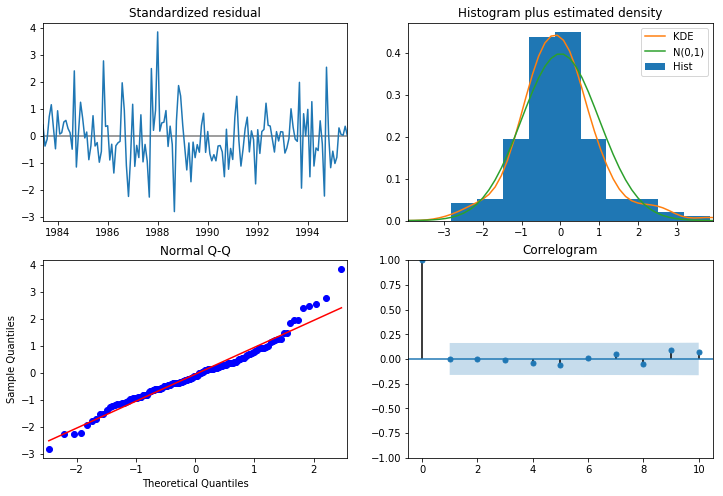

In [156]:
results_full_data_model.plot_diagnostics();

Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [157]:
predicted_manual_SARIMA_6_full_data_Sparkling = results_full_data_model.get_forecast(steps=12)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [158]:
predicted_manual_SARIMA_6_full_data_Sparkling.summary_frame(alpha=0.05)

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,2132.776769,373.934654,1399.878314,2865.675223
1995-09-30,2359.398133,379.075631,1616.423549,3102.372717
1995-10-31,3266.882782,379.150939,2523.760596,4010.004967
1995-11-30,4040.248120,381.487465,3292.546427,4787.949812
1995-12-31,6101.119618,381.594674,5353.207802,6849.031435
1996-01-31,1339.521607,382.793219,589.260685,2089.782529
1996-02-29,1627.011523,382.914157,876.513566,2377.509481
1996-03-31,1852.837623,383.722533,1100.755278,2604.919968
1996-04-30,1794.715870,383.981625,1042.125714,2547.306026
1996-05-31,1662.211602,384.678945,908.254724,2416.168481


In [159]:
rmse_full_model_Sparkling = mean_squared_error(df_Sparkling['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_full_model_Sparkling)

RMSE of the Full Model 568.78862913566


In [160]:
pred_full_manual_SARIMA_date_sparkling = predicted_manual_SARIMA_6_full_data_Sparkling.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

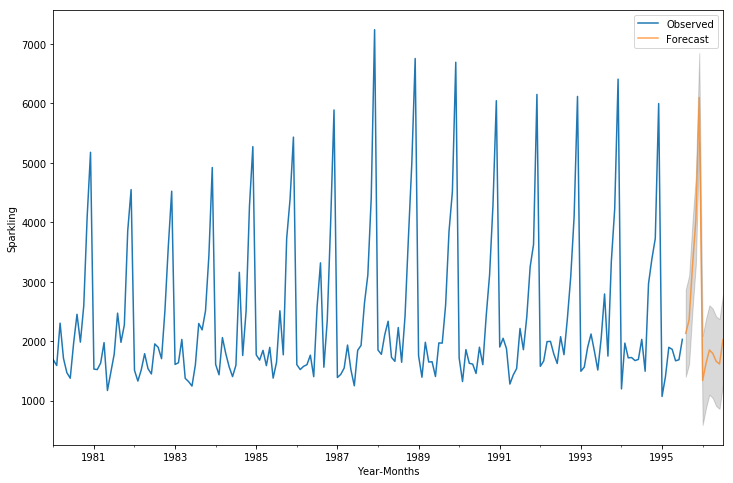

In [161]:
# plot the forecast along with the confidence band

axis = df_Sparkling['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date_sparkling['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date_sparkling.index, pred_full_manual_SARIMA_date_sparkling['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date_sparkling['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

SARIMA Model is performing best in this case giving us the least error.

Looking at the bar plot, we can see that on December months the sales are highest. We can use this insights to increase our sales further.

We can introduce certain offers in November, December months to attaract more customers.

Year 1988 has the highest sales recorded till data. We can go back to find out the reasons to which pushed the sales so much.
Looking at the prediction, we can say that the sales figure will be more or less same as that of previous year. Hence some important measures have to be taken to increase the trend. As the trend has been more or less constant through out the years.

